# Setup

In [1]:
# standard imports
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import sys
import seaborn as sns; sns.set_style('whitegrid')
import scipy.stats as ss
import os

# custom classes
from codes.preprocess import *

# Loading and Inspecting

In [24]:
# load preprocessed data
hp_data = data_plus({df_name: hp_df_plus(pd.read_csv(df_name + '.csv',
                                         index_col=['split', 'Id']))
                     for df_name in ['orig', 'edit', 'model']})
orig, edit, model = (hp_data.dfs['orig'], hp_data.dfs['edit'],
                     hp_data.dfs['model'])

FileNotFoundError: [Errno 2] File b'orig.csv' does not exist: b'orig.csv'

In [3]:
# set column data types
cats = edit.drop(columns=['SalePrice']).select_dtypes('object')
edit.loc[: , cats.columns] = cats.astype('category')
edit.loc[: , 'MSSubClass'] = edit['MSSubClass'].astype(str).astype('category')
edit.info()

<class 'preprocess.hp_df_plus'>
MultiIndex: 2916 entries, (train, 1) to (test, 2919)
Data columns (total 75 columns):
MSSubClass       2916 non-null category
MSZoning         2916 non-null category
Neighborhood     2916 non-null category
LandContour      2916 non-null category
LotConfig        2916 non-null category
Condition1       2916 non-null category
Condition2       2916 non-null category
BldgType         2916 non-null category
HouseStyle       2916 non-null category
RoofStyle        2916 non-null category
RoofMatl         2916 non-null category
Exterior1st      2916 non-null category
Exterior2nd      2916 non-null category
MasVnrType       2916 non-null category
Foundation       2916 non-null category
Heating          2916 non-null category
CentralAir       2916 non-null category
Electrical       2916 non-null category
GarageType       2916 non-null category
SaleType         2916 non-null category
SaleCondition    2916 non-null category
OverallQual      2916 non-null int64
Overa

# `SalePrice`

## Distribution

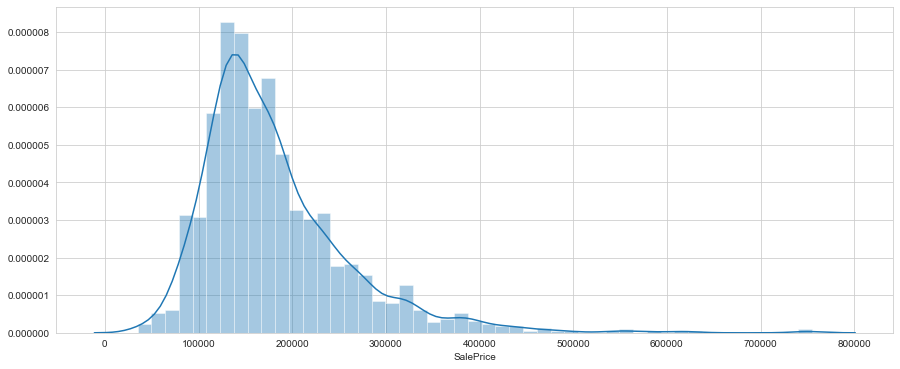

In [4]:
plt.figure(figsize=(15, 6))
sns.distplot(edit.loc['train', :]['SalePrice'])

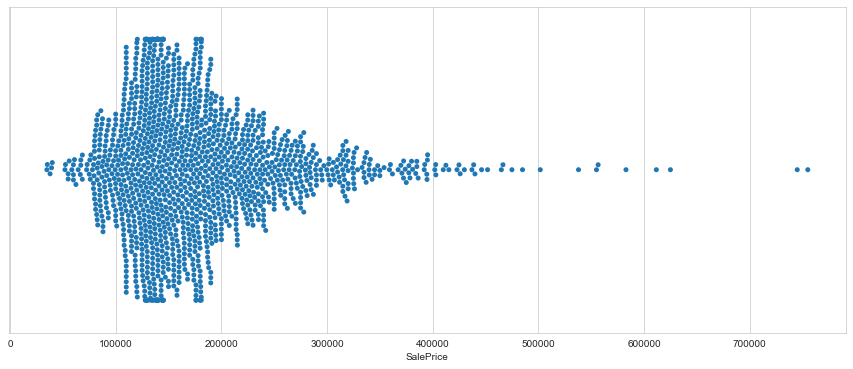

In [5]:
plt.figure(figsize=(15, 6))

sns.swarmplot(edit.loc['train', :]['SalePrice'])

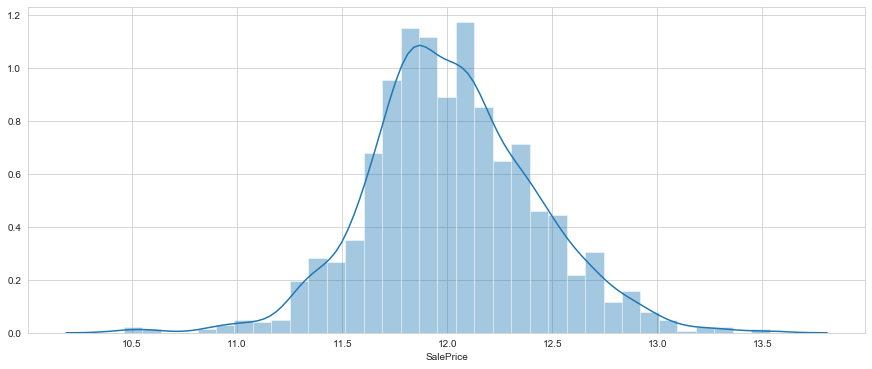

In [6]:
plt.figure(figsize=(15, 6))
sns.distplot(np.log(edit.loc['train', :]['SalePrice']))

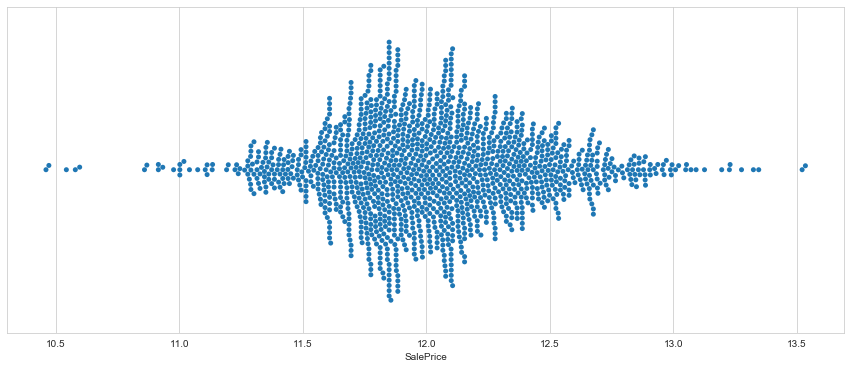

In [7]:
plt.figure(figsize=(15, 6))
sns.swarmplot(np.log(edit.loc['train', :]['SalePrice']))

## Quantile Plot

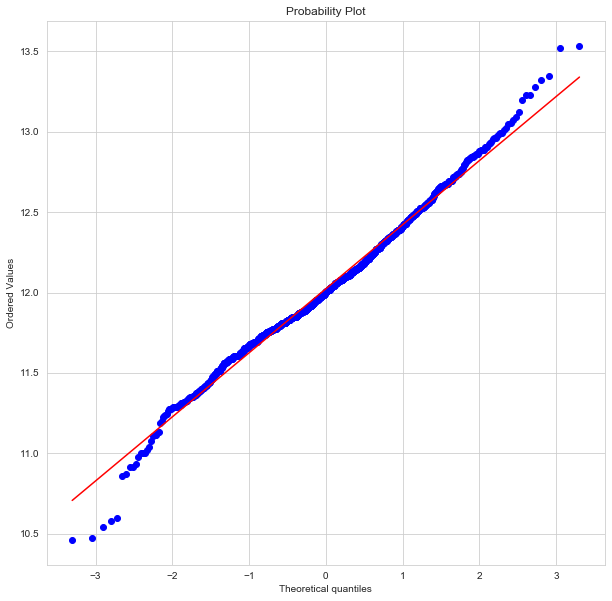

In [8]:
plt.figure(figsize=(10, 10))
ss.probplot(np.log(edit.loc['train', :]['SalePrice']), plot=plt)
plt.show()

##### Observations

The distribution appears to be close to log-normal, with longer tails

## Kolmogorov - Smirnov test

This is a [non-parametric test for comparing distributions](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test). We'll use `scipy.stats` [implementation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)

In [9]:
from scipy.stats import kstest

log_sp = np.log(edit.loc['train', :]['SalePrice'])
std_log_sp = (log_sp - log_sp.mean())/ log_sp.std()
kstest(std_log_sp, 'norm')

KstestResult(statistic=0.040671928883146746, pvalue=0.015679943720790863)

# Categorical variables

## Inspection and descriptions

In [10]:
cats = edit.select_dtypes('category')
cats.head()

MSSubClass MSZoning Neighborhood LandContour LotConfig Condition1  \
split Id                                                                     
train 1          60       RL      CollgCr         Lvl    Inside       Norm   
      2          20       RL      Veenker         Lvl       FR2      Feedr   
      3          60       RL      CollgCr         Lvl    Inside       Norm   
      4          70       RL      Crawfor         Lvl    Corner       Norm   
      5          60       RL      NoRidge         Lvl       FR2       Norm   

         Condition2 BldgType HouseStyle RoofStyle  ... Exterior1st  \
split Id                                           ...               
train 1        Norm     1Fam     2Story     Gable  ...     VinylSd   
      2        Norm     1Fam     1Story     Gable  ...     MetalSd   
      3        Norm     1Fam     2Story     Gable  ...     VinylSd   
      4        Norm     1Fam     2Story     Gable  ...     Wd Sdng   
      5        Norm     1Fam     2Story     Gable  ...     VinylSd   

         Exterior2nd MasVnrType Foundation Heating CentralAir Electrical  \
split Id                                                                   
train 1      VinylSd    BrkFace      PConc    GasA          Y      SBrkr   
      2      MetalSd       None     CBlock    GasA          Y      SBrkr   
      3      VinylSd    BrkFace      PConc    GasA          Y      SBrkr   
      4      Wd Shng       None     BrkTil    GasA          Y      SBrkr   
      5      VinylSd    BrkFace      PConc    GasA          Y      SBrkr   

         GarageType SaleType SaleCondition  
split Id                                    
train 1      Attchd       WD        Normal  
      2      Attchd       WD        Normal  
      3      Attchd       WD        Normal  
      4      2Types       WD       Abnorml  
      5      Attchd       WD        Normal  

[5 rows x 21 columns]

In [11]:
desc = description('data_description.txt')
desc.build_dict()
desc.clean_dict()
desc.clean_var_names()
cats.print_desc(desc)

MSSubClass: Identifies the type of dwelling involved in the sale.

	 20 - 1-STORY 1946 & NEWER ALL STYLES
	 30 - 1-STORY 1945 & OLDER
	 40 - 1-STORY W/FINISHED ATTIC ALL AGES
	 45 - 1-1/2 STORY - UNFINISHED ALL AGES
	 50 - 1-1/2 STORY FINISHED ALL AGES
	 60 - 2-STORY 1946 & NEWER
	 70 - 2-STORY 1945 & OLDER
	 75 - 2-1/2 STORY ALL AGES
	 80 - SPLIT OR MULTI-LEVEL
	 85 - SPLIT FOYER
	 90 - DUPLEX - ALL STYLES AND AGES
	 120 - 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
	 150 - 1-1/2 STORY PUD - ALL AGES
	 160 - 2-STORY PUD - 1946 & NEWER
	 180 - PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
	 190 - 2 FAMILY CONVERSION - ALL STYLES AND AGES


MSZoning: Identifies the general zoning classification of the sale.

	 A - Agriculture
	 C - Commercial
	 FV - Floating Village Residential
	 I - Industrial
	 RH - Residential High Density
	 RL - Residential Low Density
	 RP - Residential Low Density Park 
	 RM - Residential Medium Density


Neighborhood: Physical locations within Ames city limit

## Individual properties

### Sample distributions and value counts

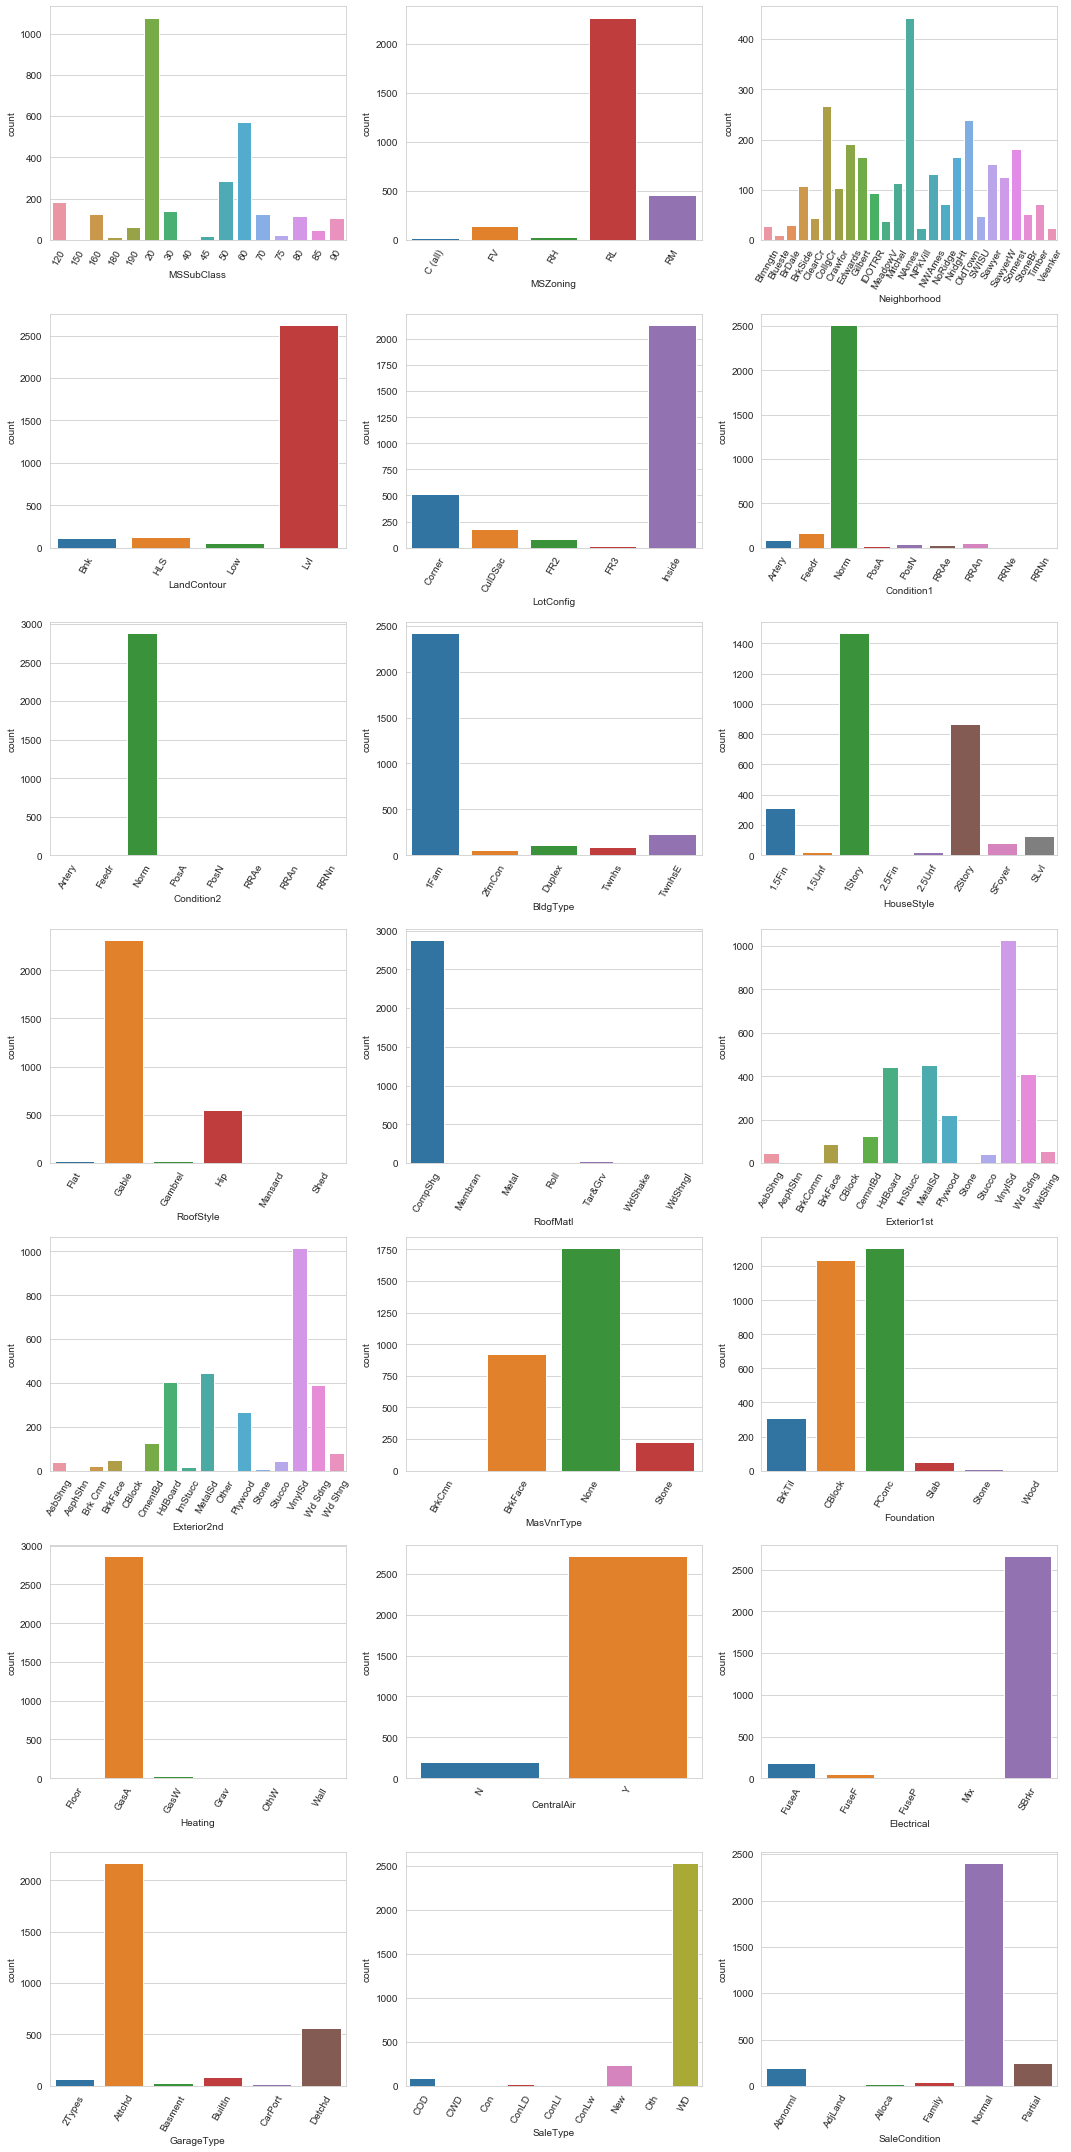

In [12]:
fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(15, 30))

for (i, col) in enumerate(cats.columns):
    plt.subplot(7, 3, i + 1)
    sns.countplot(cats[col])
    plt.xticks(rotation=60)
    
fig.tight_layout()

In [13]:
print("Value counts are:", '\n')
for col in cats.columns:
    print(cats[col].value_counts(), '\n')

Value counts are: 

20     1078
60      573
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64 

RL         2266
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64 

NAmes      443
CollgCr    267
OldTown    239
Edwards    192
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     43
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64 

Lvl    2622
HLS     120
Bnk     115
Low      59
Name: LandContour, dtype: int64 

Inside     2132
Corner      510
CulDSac     175
FR2          85
FR3          14
Name: LotConfig, dtype: int64 

Norm      2510
Feedr      163
Artery    

Of these, only `Condition2` seems likely to have a significant association with `SalePrice`, or at least some of its values might. Still, it may be somewhat redundant given condition 1.

## Relationships between categorical variables

### Mutual information

#### Standardized variation of information

The function

$$d(X, Y) = H(X, Y) - I(X, Y)$$

where $H(X, Y)$ is the joint entropy $I(X, Y)$ and mutual information, [defines a metric](https://arxiv.org/pdf/q-bio/0311039.pdf) on the set of random variables. Note that

$$d(X, Y) = H(X|Y) + H(Y|X)$$

which is sometimes called the "variation of information". One can normalize

$$D(X, Y) = \frac{d(X, Y)}{H(X, Y)} = 1 - \frac{I(X, Y)}{H(X, Y)} $$

so that $D(X, Y) \in [0, 1]$. Since $D$ is a metric, $D(X, Y) = 0$ iff $X = Y$ (***actually this is not entirely clear, what about the case $Y = f(X)$? Then $H(Y|X) = H(X|Y) = 0$, hence $I(X, Y) = H(X, Y)$, hence $D(X, Y) = 0$. So probably need to mod out the set of random variables by a functional equivalence to get a metric space***).  

Furthermore, $D(X, Y) = 1$ iff $I(X, Y) = 0$ iff $X, Y$ are independendent (*perhaps, excluding $X=Y=0$*). So we can take $D(X, Y)$ as a "dependence based distance". The closer a variable $Y$ is to $X$, the more it depends on $X$.

We rely on the Python package `pyitlib` to compute $D(X, Y)$.

In [14]:
from sklearn.preprocessing import LabelEncoder
cats_num = cats.apply(LabelEncoder().fit_transform)
cats_num.head()

MSSubClass  MSZoning  Neighborhood  LandContour  LotConfig  \
split Id                                                               
train 1           10         3             5            3          4   
      2            5         3            24            3          2   
      3           10         3             5            3          4   
      4           11         3             6            3          0   
      5           10         3            15            3          2   

          Condition1  Condition2  BldgType  HouseStyle  RoofStyle  ...  \
split Id                                                           ...   
train 1            2           2         0           5          1  ...   
      2            1           2         0           2          1  ...   
      3            2           2         0           5          1  ...   
      4            2           2         0           5          1  ...   
      5            2           2         0           5          1  ...   

          Exterior1st  Exterior2nd  MasVnrType  Foundation  Heating  \
split Id                                                              
train 1            12           13           1           2        1   
      2             8            8           2           1        1   
      3            12           13           1           2        1   
      4            13           15           2           0        1   
      5            12           13           1           2        1   

          CentralAir  Electrical  GarageType  SaleType  SaleCondition  
split Id                                                               
train 1            1           4           1         8              4  
      2            1           4           1         8              4  
      3            1           4           1         8              4  
      4            1           4           0         8              0  
      5            1           4           1         8              4  

[5 rows x 21 columns]

In [15]:
from pyitlib import discrete_random_variable as drv
import time

def D(df, col1, col2, **kwargs):
    return (drv.information_variation(df[[col1, col2]].T, **kwargs)/drv.entropy_joint(df[[col1, col2]].T, **kwargs))[0, 1]
    
def D_dep(df, **kwargs):
    dep_df = pd.DataFrame(columns=df.columns, index=df.columns)
    for (col1, col2) in combinations(df.columns, 2):
        dep_df.loc[col1, col2] = dep_df.loc[col2, col1] = D(df, col1, col2)
        dep_df.loc[col1, col1] = dep_df.loc[col2, col2] = 0.0
    for col in dep_df.columns:
        dep_df.loc[:, col] = pd.to_numeric(dep_df[col])
    return dep_df

start = time.time()
D_dep_df = D_dep(cats_num, estimator='MINIMAX')
print(time.time() - start, 'seconds')

48.58610010147095 seconds


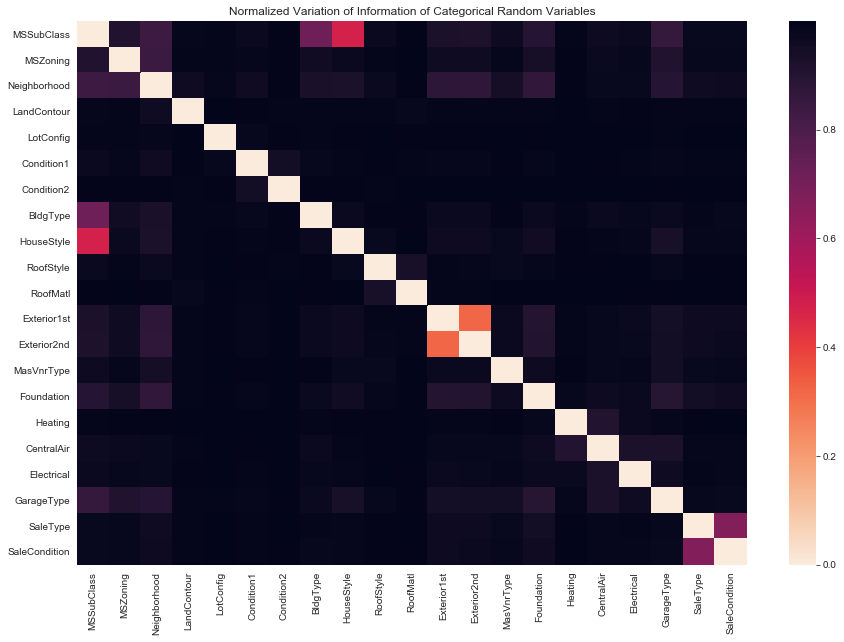

In [16]:
plt.figure(figsize=(15, 10))
plt.title('Normalized Variation of Information of Categorical Random Variables')
cmap = sns.cm.rocket_r
sns.heatmap(D_dep_df, cmap=cmap)

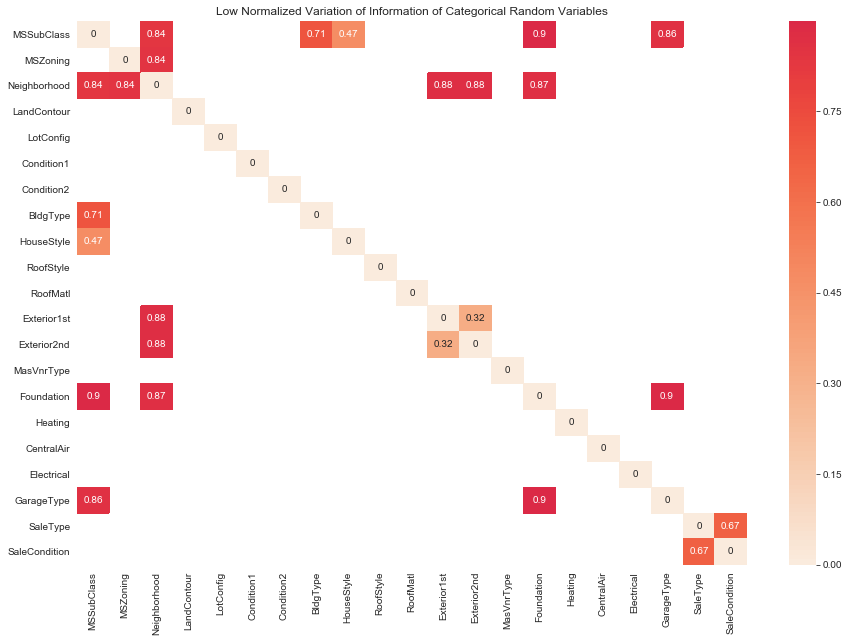

In [17]:
plt.figure(figsize=(15, 10))
plt.title('Low Normalized Variation of Information of Categorical Random Variables')
sns.heatmap(D_dep_df[D_dep_df < 0.9], cmap=cmap, center=1, annot=True)

##### Observations

#### Alternative standardized measure of independence

Given two random variables $X, Y$, one can define [a convenient measure of dependence](https://link.springer.com/article/10.1007/s11071-006-2019-0)

$$M(X, Y) = \sqrt{1 - e^{-2I(X, Y)}}$$

where $I(X, Y)$ is the mutual information. Note if $X \perp Y$ then $M(X, Y) = 0$, while $M(X, Y) \rightarrow 1$ as $I(X, Y) \rightarrow \infty$. Thus $M(X, Y)$ provides a standardized measure of independence.

We use sklearn's `mutual_info_score` to estimate $I(X, Y)$.

In [18]:
def M(df, col1, col2, **kwargs):
    mi = drv.information_mutual(df[[col1, col2]].T, **kwargs)[0, 1]
    return np.sqrt(1 - np.exp(-2*mi))

def M_dep(df, **kwargs):
    dep_df = pd.DataFrame(columns=df.columns, index=df.columns)
    for (col1, col2) in combinations(df.columns, 2):
        dep_df.loc[col1, col2] = dep_df.loc[col2, col1] = M(df, col1, col2)
        dep_df.loc[col1, col1] = dep_df.loc[col2, col2] = 0.0
    for col in dep_df.columns:
        dep_df.loc[:, col] = pd.to_numeric(dep_df[col])
    return dep_df

start = time.time()
M_dep_df = M_dep(cats_num, estimator='MINIMAX')
print(time.time() - start, 'seconds')

22.221182346343994 seconds


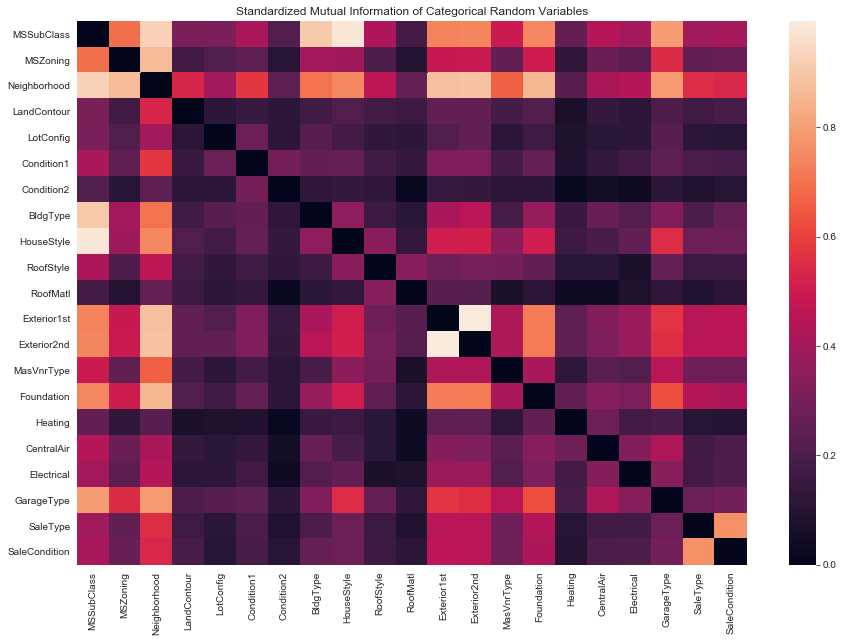

In [19]:
plt.figure(figsize=(15, 10))
plt.title('Standardized Mutual Information of Categorical Random Variables')
sns.heatmap(M_dep_df)

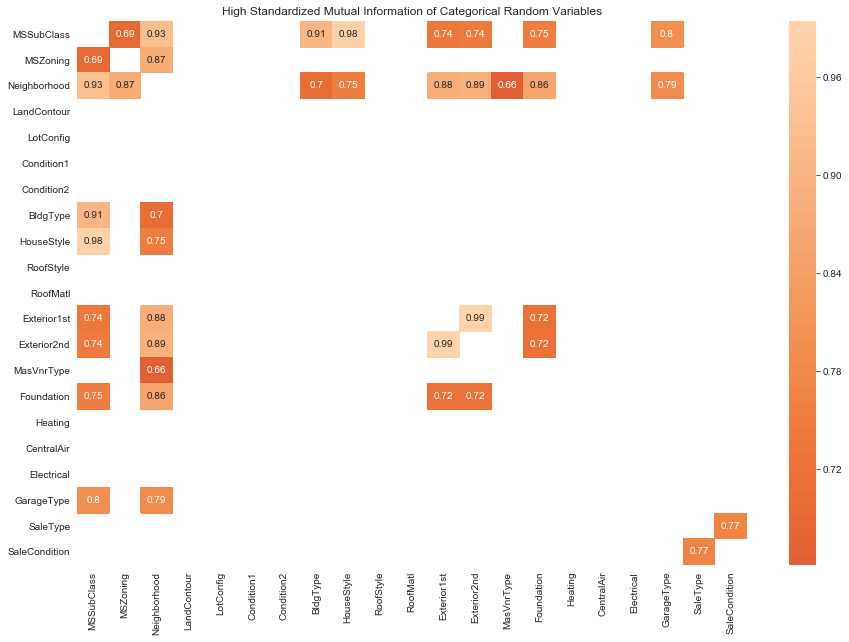

In [20]:
plt.figure(figsize=(15, 10))
plt.title('High Standardized Mutual Information of Categorical Random Variables')
sns.heatmap(M_dep_df[M_dep_df >= 0.65], center=0, annot=True)

In [21]:
def pair_var(dep_df, var_name):
    res = pd.DataFrame(columns=['var1', 'var2', var_name])
    for (col1, col2) in combinations(dep_df.columns, 2):
        dep = dep_df.loc[col1, col2]
        res = res.append(pd.DataFrame([[col1, col2, dep]], columns=res.columns))
    return res.reset_index(drop=True)
        
dep_df = pair_var(D_dep_df, 'D')
print('Variable pairs sorted by D estimate of dependence')
dep_df.sort_values('D')[:10]

Variable pairs sorted by D estimate of dependence


var1           var2         D
165   Exterior1st    Exterior2nd  0.322737
7      MSSubClass     HouseStyle  0.472661
209      SaleType  SaleCondition  0.667950
6      MSSubClass       BldgType  0.714236
1      MSSubClass   Neighborhood  0.841969
20       MSZoning   Neighborhood  0.844055
17     MSSubClass     GarageType  0.859476
50   Neighborhood     Foundation  0.866796
48   Neighborhood    Exterior2nd  0.877009
47   Neighborhood    Exterior1st  0.878801

In [22]:
dep_df['M'] = pair_var(M_dep_df, 'M')['M']
print('Variable pairs sorted by M estimate of dependence')
dep_df.sort_values('M', ascending=False)[:20]

Variable pairs sorted by M estimate of dependence


var1           var2         D         M
165   Exterior1st    Exterior2nd  0.322737  0.994153
7      MSSubClass     HouseStyle  0.472661  0.981107
1      MSSubClass   Neighborhood  0.841969  0.925881
6      MSSubClass       BldgType  0.714236  0.906845
48   Neighborhood    Exterior2nd  0.877009  0.885712
47   Neighborhood    Exterior1st  0.878801  0.881153
20       MSZoning   Neighborhood  0.844055  0.870070
50   Neighborhood     Foundation  0.866796  0.860775
17     MSSubClass     GarageType  0.859476  0.795854
54   Neighborhood     GarageType  0.900155  0.788867
209      SaleType  SaleCondition  0.667950  0.766292
13     MSSubClass     Foundation  0.898964  0.747316
44   Neighborhood     HouseStyle  0.927651  0.746905
11     MSSubClass    Exterior2nd  0.924194  0.743739
10     MSSubClass    Exterior1st  0.925093  0.737740
167   Exterior1st     Foundation  0.904882  0.722597
175   Exterior2nd     Foundation  0.907314  0.721228
43   Neighborhood       BldgType  0.929981  0.701583
0      MSSubClass       MSZoning  0.909998  0.692389
49   Neighborhood     MasVnrType  0.944441  0.661577

##### Comparison of $D$ and $M$ measures of dependence by ranking

In [23]:
def rank_cols(dep_df, cols):
    df = dep_df.copy()
    for col in cols:
        df = df.sort_values(by=col, ascending=cols[col])
        df[col + '_rank'] = range(len(df))
        df = df.sort_index()
    return df

dep_df = rank_cols(dep_df, {'D': True, 'M': False})

In [24]:
dep_df.sort_values(by='D_rank')[:10]

var1           var2         D         M  D_rank  M_rank
165   Exterior1st    Exterior2nd  0.322737  0.994153       0       0
7      MSSubClass     HouseStyle  0.472661  0.981107       1       1
209      SaleType  SaleCondition  0.667950  0.766292       2      10
6      MSSubClass       BldgType  0.714236  0.906845       3       3
1      MSSubClass   Neighborhood  0.841969  0.925881       4       2
20       MSZoning   Neighborhood  0.844055  0.870070       5       6
17     MSSubClass     GarageType  0.859476  0.795854       6       8
50   Neighborhood     Foundation  0.866796  0.860775       7       7
48   Neighborhood    Exterior2nd  0.877009  0.885712       8       4
47   Neighborhood    Exterior1st  0.878801  0.881153       9       5

In [25]:
dep_df.sort_values(by='M_rank')[:10]

var1          var2         D         M  D_rank  M_rank
165   Exterior1st   Exterior2nd  0.322737  0.994153       0       0
7      MSSubClass    HouseStyle  0.472661  0.981107       1       1
1      MSSubClass  Neighborhood  0.841969  0.925881       4       2
6      MSSubClass      BldgType  0.714236  0.906845       3       3
48   Neighborhood   Exterior2nd  0.877009  0.885712       8       4
47   Neighborhood   Exterior1st  0.878801  0.881153       9       5
20       MSZoning  Neighborhood  0.844055  0.870070       5       6
50   Neighborhood    Foundation  0.866796  0.860775       7       7
17     MSSubClass    GarageType  0.859476  0.795854       6       8
54   Neighborhood    GarageType  0.900155  0.788867      12       9

##### Observations:

- The diagonal entries correspond to the self information which is also the entropy $I(X, X) = H(X)$. Some variables with highest self-information are (starting with the maximum and in descending order) `Neighborhood`, `MSSubClass`, `Exterior1st`, `Exterior2nd`, `HouseStyle`. Comparing these with the distributions above, we see this the variables with highest self-information have a high number of categories and somewhat balanced distributions. We also note variables with low self-information are `CentralAir`, `RoofMatl`, `Condition2`, and `Heating`, and we observed previously that these variables have very unbalanced distributions.

- Notable pairs of distinct variables with high mutual information are
    - `Exterior1st` and `Exterior2nd` have very high mutual info ($\approx 0.98$). Their distributions are very similar and they have the same values. It probably makes more sense to think of them as close to indentically distributed. 
    - `MSSubclass` and `HouseStyle` have very high mutual info ($\approx 0.94$). Inspecting their descriptions above we see that they have very similar categories, so they are measuring very similar things. `BldgType` and `MSSubclass` ($\approx 0.85$) are similar. 
    - `MSSubclass` and `Neighborhood` ($\approx 0.86$) are perhaps the first interesting pair in that they are measuring different things. We can imagine that the association between these two variables is strong -- it makes sense that the size/age/type of house would be associated to the neighborhood. Similarly, `Exterior1st`, `Exterior2nd`, `MSZoning`, `Foundation`, `GarageType` and `HouseStyle` also have strong associations with `Neighborhood`.
    - `SaleCondition` and `SaleType` ($\approx 0.68$) are also unsurprisingly associated. 

##### Recommendations

Pending the results of analysis of assocation with `SalePrice`, 
- Drop the variables with low self-information: `CentralAir`, `RoofMatl`, `Condition2`, and `Heating`. We already suspected they should be dropped given how unbalanced their distributions are. We'll also drop `RoofStyle`.
- Drop `Exterior2nd` since it seems redundant. 
- Retain `MSSubclass` due to the high amount self-information, and drop `HouseStyle` and `BldgType`.
- Retain `Neighborhood` due to high self-information and drop `MSZoning`, `Foundation`, `GarageType`.

## Relationships between categoricals and response

We'll measure dependence with $log($ `SalePrice` $)$

In [26]:
cats_num['log_SalePrice'] = np.log(edit['SalePrice'])

### One-way ANOVA with post-hoc tests

In [27]:
grouping = edit.loc['train', :].groupby(by='CentralAir')
N = edit.loc['train', :].loc[grouping.groups['N'], :]['SalePrice']
Y = edit.loc['train', :].loc[grouping.groups['Y'], :]['SalePrice']
ss.f_oneway(N, Y)

F_onewayResult(statistic=98.07717916976691, pvalue=2.0221990783036355e-22)

### Standardized Variation of Information 

In [28]:
vi = np.array([D(cats_num.loc['train', :], col, 'log_SalePrice') for col in cats_num.columns])
vi = pd.DataFrame(vi, columns=['D'], index=cats_num.columns).sort_values(by='D', ascending=True)
vi

D
log_SalePrice  0.000000
Neighborhood   0.714954
MSSubClass     0.813053
Exterior2nd    0.830389
Exterior1st    0.838353
HouseStyle     0.892118
Foundation     0.902516
GarageType     0.924386
MasVnrType     0.924770
SaleCondition  0.926450
LotConfig      0.927426
MSZoning       0.933675
SaleType       0.935679
Condition1     0.940552
BldgType       0.940599
RoofStyle      0.944444
LandContour    0.956517
Electrical     0.965513
CentralAir     0.974540
Heating        0.984413
RoofMatl       0.987576
Condition2     0.991772

### Violin plots

In [29]:
df = cats.copy()
df['log_SalePrice'] = cats_num['log_SalePrice']

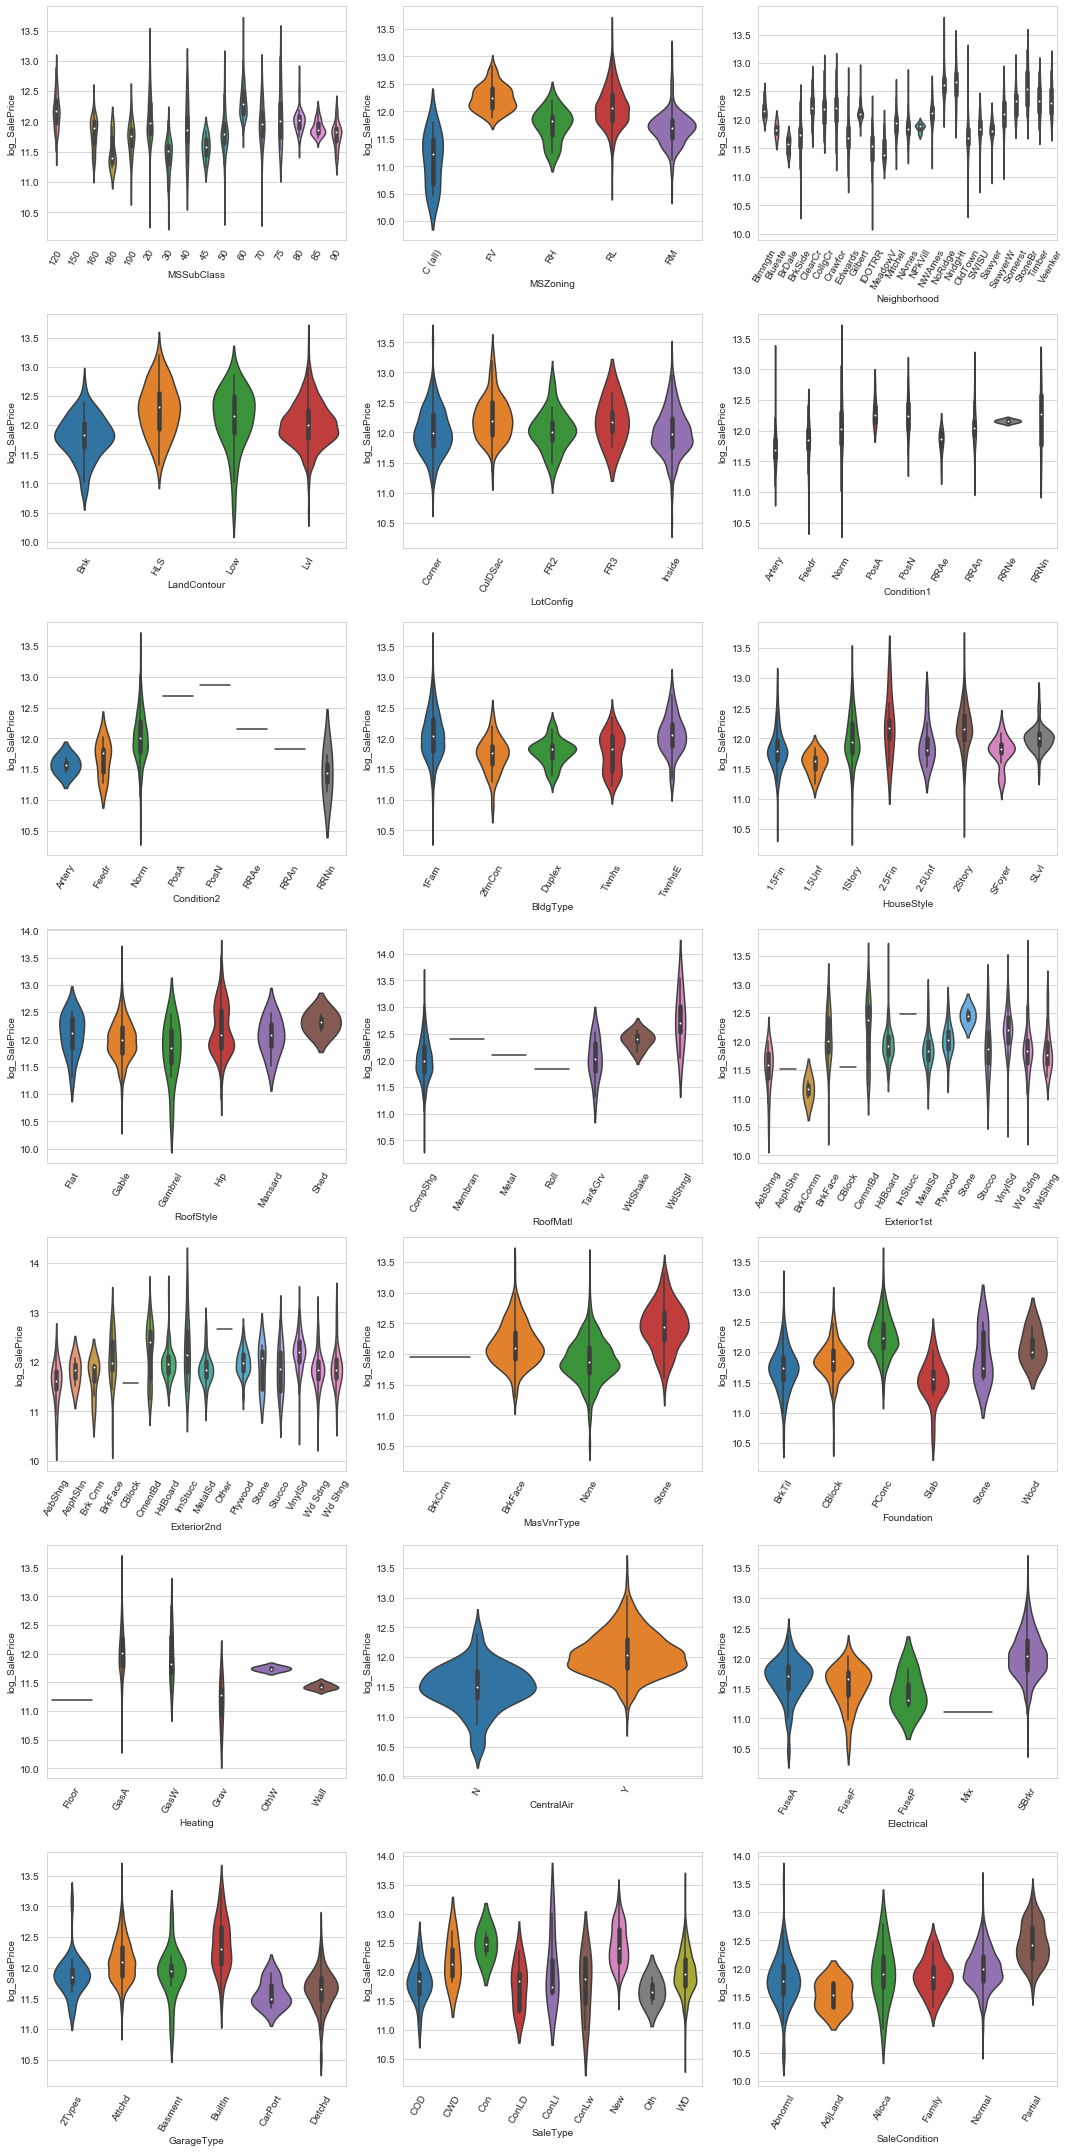

In [30]:
fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(15, 30))

for (i, col) in enumerate(cats.columns):
    plt.subplot(7, 3, i + 1)
    sns.violinplot(x=col,y='log_SalePrice', data=df)
    plt.xticks(rotation=60)
    
fig.tight_layout()

##### Observations

# Ordinal Variables

## Inspection and descriptions

In [31]:
ords = edit.select_dtypes('int64')
ords.head()

OverallQual  OverallCond  ExterQual  ExterCond  BsmtQual  BsmtCond  \
split Id                                                                       
train 1             7            5          2          3         3         3   
      2             6            8          1          3         3         3   
      3             7            5          2          3         3         3   
      4             7            5          1          3         2         4   
      5             8            5          2          3         3         3   

          BsmtExposure  BsmtFinType1  BsmtFinType2  HeatingQC  ...  LotShape  \
split Id                                                       ...             
train 1              1             6             1          5  ...         0   
      2              4             5             1          5  ...         0   
      3              2             6             1          5  ...         1   
      4              1             5             1          4  ...         1   
      5              3             6             1          5  ...         1   

          Fence  LandSlope  PavedDrive  PoolQC  MoSold  YrSold  YearBuilt  \
split Id                                                                    
train 1       0          0           2       0       2    2008       2003   
      2       0          0           2       0       5    2007       1976   
      3       0          0           2       0       9    2008       2001   
      4       0          0           2       0       2    2006       1915   
      5       0          0           2       0      12    2008       2000   

          YearRemodAdd  GarageYrBlt  
split Id                             
train 1           2003         2003  
      2           1976         1976  
      3           2002         2001  
      4           1970         1998  
      5           2000         2000  

[5 rows x 35 columns]

In [32]:
ords.info()

<class 'preprocess.hp_df_plus'>
MultiIndex: 2916 entries, (train, 1) to (test, 2919)
Data columns (total 35 columns):
OverallQual     2916 non-null int64
OverallCond     2916 non-null int64
ExterQual       2916 non-null int64
ExterCond       2916 non-null int64
BsmtQual        2916 non-null int64
BsmtCond        2916 non-null int64
BsmtExposure    2916 non-null int64
BsmtFinType1    2916 non-null int64
BsmtFinType2    2916 non-null int64
HeatingQC       2916 non-null int64
BsmtFullBath    2916 non-null int64
BsmtHalfBath    2916 non-null int64
FullBath        2916 non-null int64
HalfBath        2916 non-null int64
BedroomAbvGr    2916 non-null int64
TotRmsAbvGrd    2916 non-null int64
KitchenAbvGr    2916 non-null int64
KitchenQual     2916 non-null int64
Functional      2916 non-null int64
Fireplaces      2916 non-null int64
FireplaceQu     2916 non-null int64
GarageFinish    2916 non-null int64
GarageCars      2916 non-null int64
GarageQual      2916 non-null int64
GarageCond      29

In [33]:
desc = description('data_description.txt')
desc.build_dict()
desc.clean_dict()
desc.clean_var_names()
ords.print_desc(desc)

OverallQual: Rates the overall material and finish of the house

	 10 - Very Excellent
	 9 - Excellent
	 8 - Very Good
	 7 - Good
	 6 - Above Average
	 5 - Average
	 4 - Below Average
	 3 - Fair
	 2 - Poor
	 1 - Very Poor


OverallCond: Rates the overall condition of the house

	 10 - Very Excellent
	 9 - Excellent
	 8 - Very Good
	 7 - Good
	 6 - Above Average
	 5 - Average
	 4 - Below Average
	 3 - Fair
	 2 - Poor
	 1 - Very Poor


ExterQual: Evaluates the quality of the material on the exterior 

	 Ex - Excellent
	 Gd - Good
	 TA - Average/Typical
	 Fa - Fair
	 Po - Poor


ExterCond: Evaluates the present condition of the material on the exterior

	 Ex - Excellent
	 Gd - Good
	 TA - Average/Typical
	 Fa - Fair
	 Po - Poor


BsmtQual: Evaluates the height of the basement

	 Ex - Excellent (100+ inches)
	 Gd - Good (90-99 inches)
	 TA - Typical (80-89 inches)
	 Fa - Fair (70-79 inches)
	 Po - Poor (<70 inches
	 NA - No Basement


BsmtCond: Evaluates the general condition of the baseme

## Sample distributions and value counts

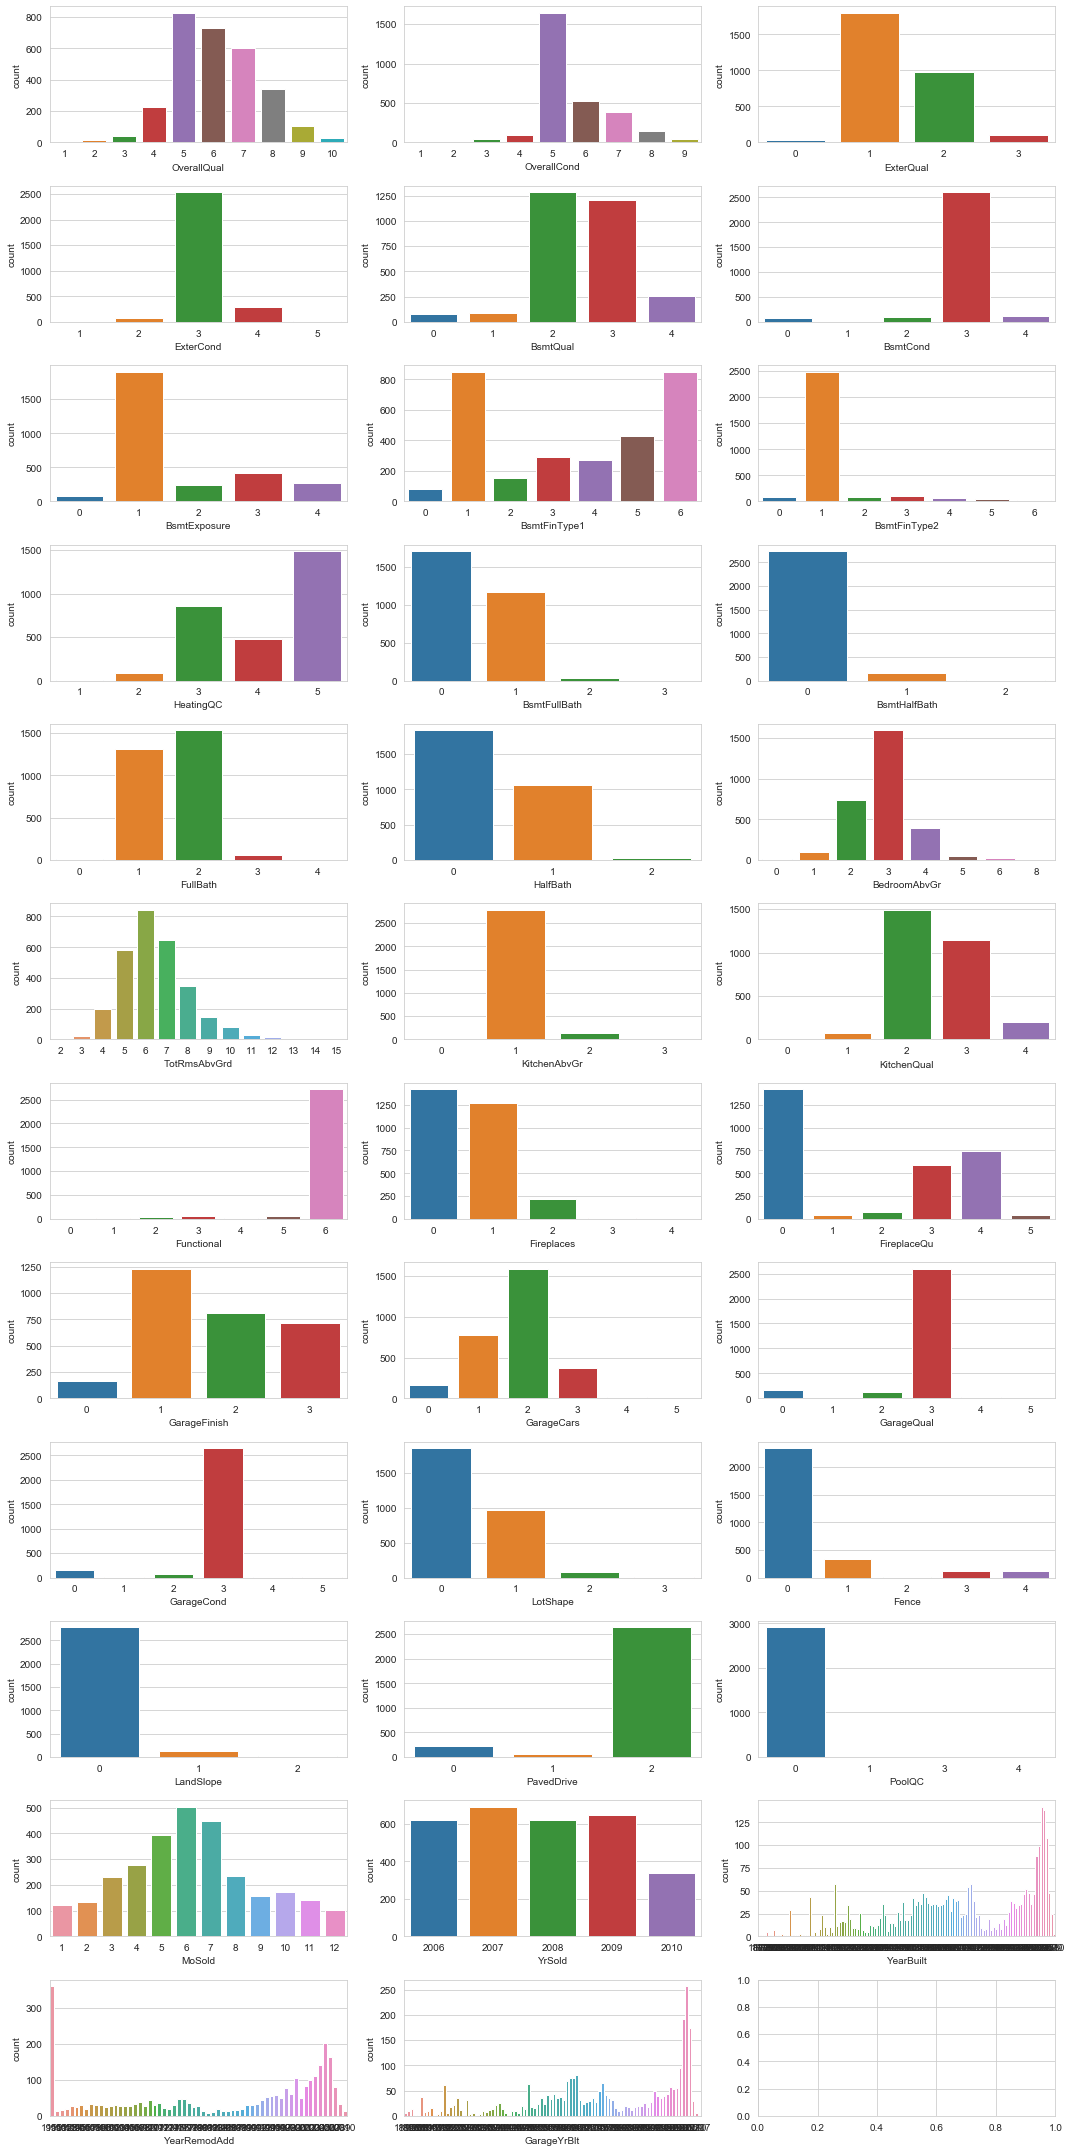

In [34]:
fig, ax = plt.subplots(nrows=12, ncols=3, figsize=(15, 30))

for (i, col) in enumerate(ords.columns):
    plt.subplot(12, 3, i + 1)
    sns.countplot(ords[col])
    
fig.tight_layout()

In [35]:
print("Value counts are:", '\n')
for col in ords.columns:
    print(ords[col].value_counts(), '\n')

Value counts are: 

5     825
6     731
7     600
8     342
4     225
9     107
3      40
10     29
2      13
1       4
Name: OverallQual, dtype: int64 

5    1643
6     530
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64 

1    1797
2     979
3     105
0      35
Name: ExterQual, dtype: int64 

3    2535
4     299
2      67
5      12
1       3
Name: ExterCond, dtype: int64 

2    1283
3    1208
4     256
1      88
0      81
Name: BsmtQual, dtype: int64 

3    2603
4     122
2     104
0      82
1       5
Name: BsmtCond, dtype: int64 

1    1904
3     418
4     273
2     239
0      82
Name: BsmtExposure, dtype: int64 

1    851
6    847
5    429
3    288
4    268
2    154
0     79
Name: BsmtFinType1, dtype: int64 

1    2490
3     105
2      87
0      80
4      68
5      52
6      34
Name: BsmtFinType2, dtype: int64 

5    1490
3     857
4     474
2      92
1       3
Name: HeatingQC, dtype: int64 

0    1707
1    1170
2      37
3     

## Relationships among ordinal variables

### Standardized variation of information

In [36]:
start = time.time()
D_dep_df = D_dep(ords, estimator='MINIMAX')
print(time.time() - start, 'seconds')

41.973536014556885 seconds


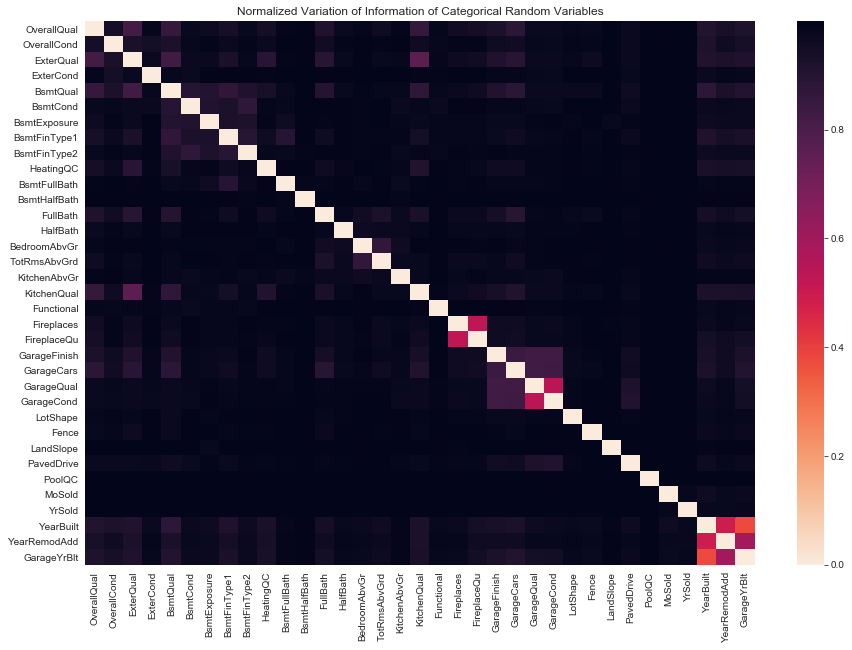

In [37]:
plt.figure(figsize=(15, 10))
plt.title('Normalized Variation of Information of Categorical Random Variables')
cmap = sns.cm.rocket_r
sns.heatmap(D_dep_df, cmap=cmap)

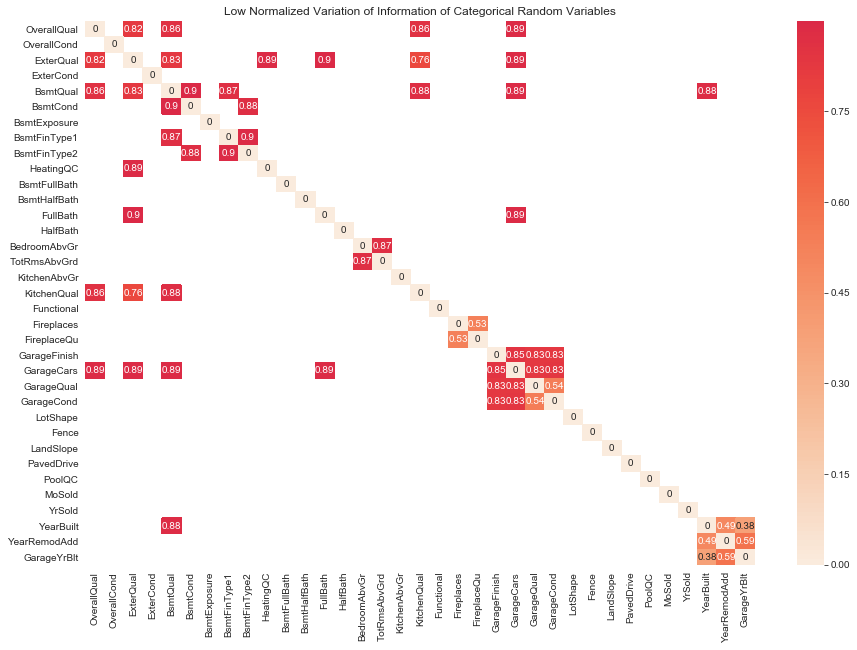

In [38]:
plt.figure(figsize=(15, 10))
plt.title('Low Normalized Variation of Information of Categorical Random Variables')
sns.heatmap(D_dep_df[D_dep_df < 0.9], cmap=cmap, center=1, annot=True)

In [39]:
dep_df = pair_var(D_dep_df, 'D')
print('Variable pairs sorted by D estimate of dependence')
dep_df.sort_values('D')[:10]

Variable pairs sorted by D estimate of dependence


var1          var2         D
593     YearBuilt   GarageYrBlt  0.377981
592     YearBuilt  YearRemodAdd  0.494564
475    Fireplaces   FireplaceQu  0.528211
529    GarageQual    GarageCond  0.542600
594  YearRemodAdd   GarageYrBlt  0.593205
81      ExterQual   KitchenQual  0.760176
1     OverallQual     ExterQual  0.822389
68      ExterQual      BsmtQual  0.829253
506  GarageFinish    GarageCond  0.829804
505  GarageFinish    GarageQual  0.830377

##### Observations:

##### Recommendations

## Relationships between ordinals and response

In [40]:
ords['log_SalePrice'] = np.log(edit['SalePrice'])

### Violin plots

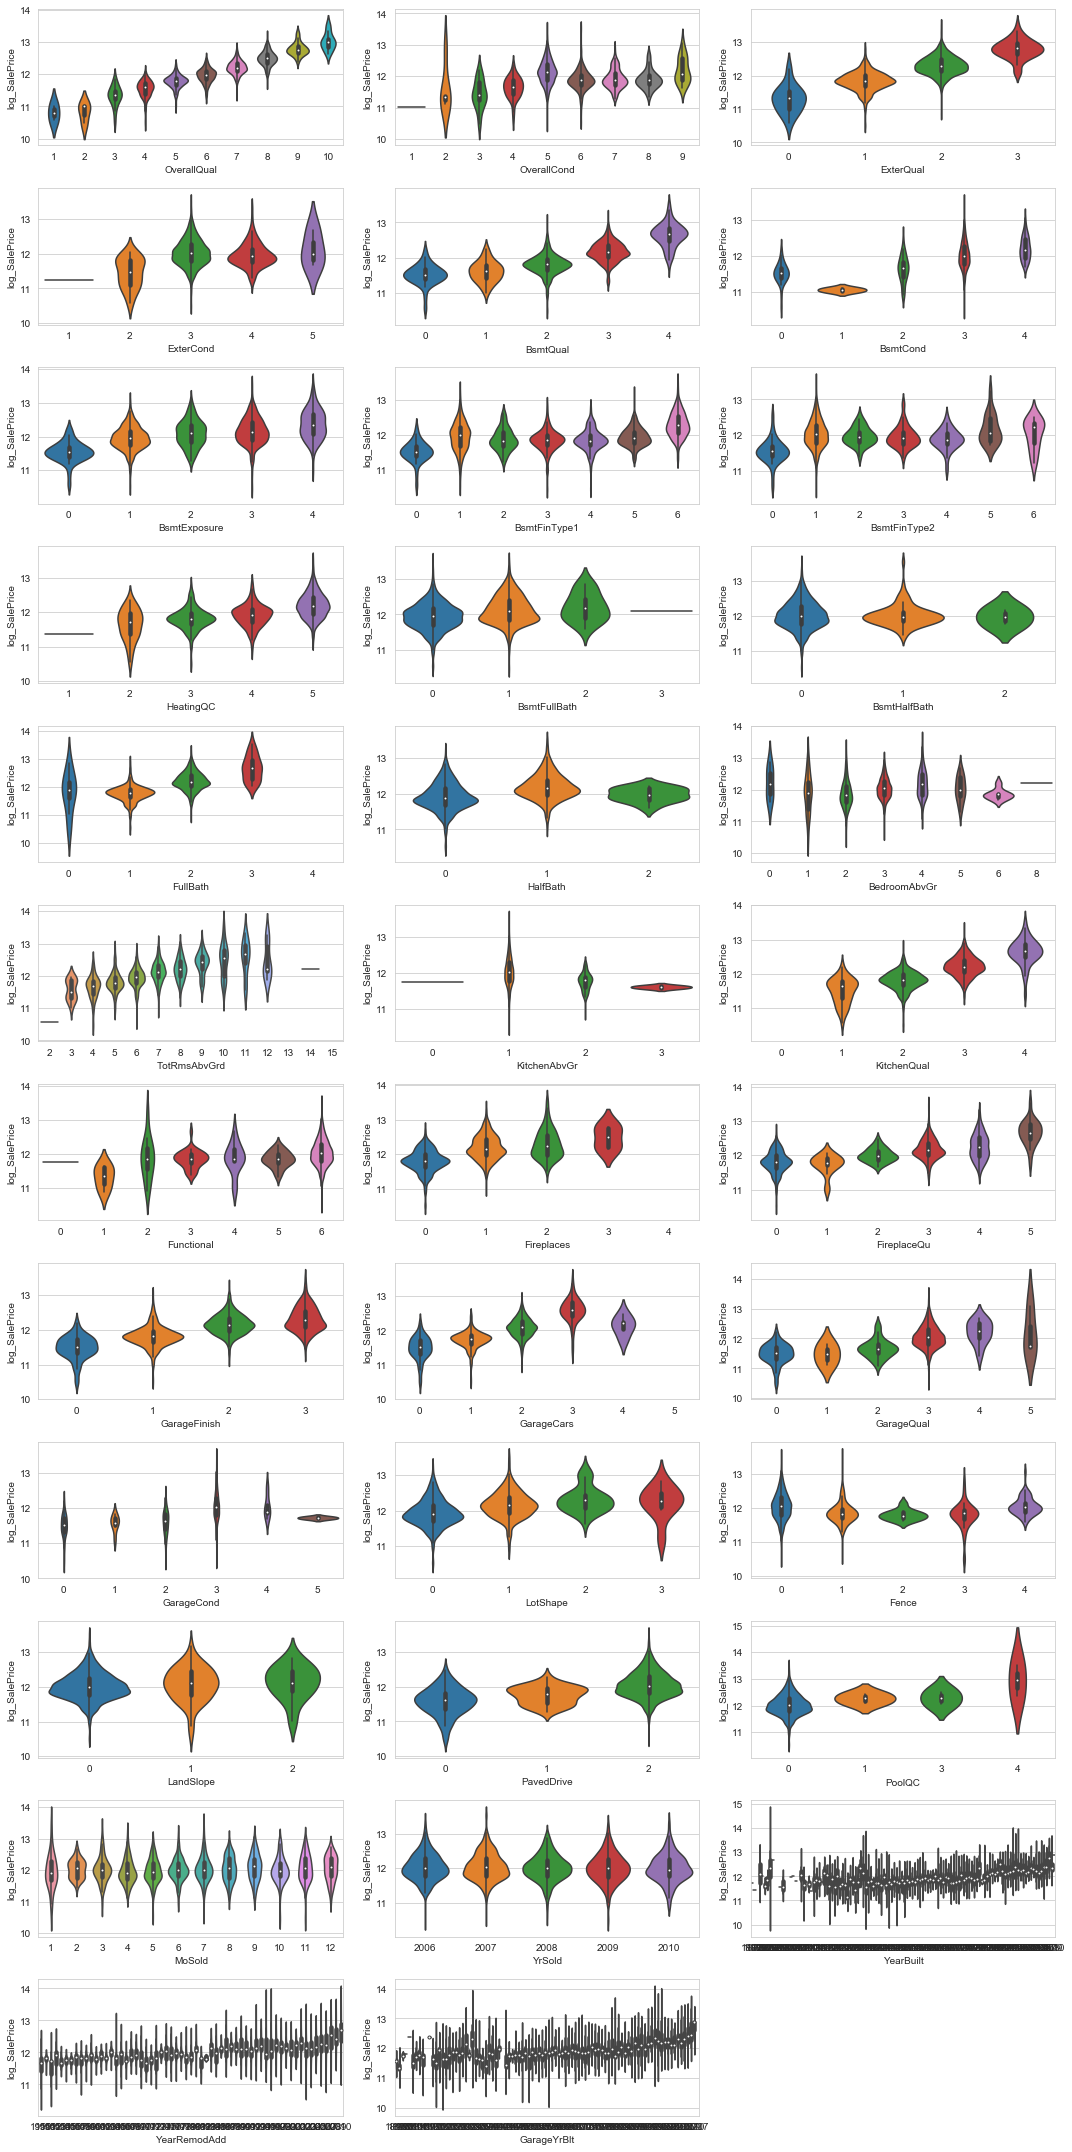

In [41]:
fig, ax = plt.subplots(nrows=18, ncols=2, figsize=(15, 30))

for (i, col) in enumerate(ords.drop(columns=['log_SalePrice']).columns):
    plt.subplot(12, 3, i + 1)
    sns.violinplot(x=col,y='log_SalePrice', data=ords)
    
fig.tight_layout()

### Standardized Variation of Information 

In [42]:
vi = np.array([D(ords.loc['train', :], col, 'log_SalePrice') for col in ords.columns])
vi = pd.DataFrame(vi, columns=['D'], index=ords.columns).sort_values(by='D', ascending=True)
vi

D
log_SalePrice  0.000000
YearBuilt      0.549242
GarageYrBlt    0.589488
YearRemodAdd   0.629891
MoSold         0.797957
OverallQual    0.824203
TotRmsAbvGrd   0.829462
BsmtFinType1   0.859629
YrSold         0.876783
GarageCars     0.883561
BsmtQual       0.885017
GarageFinish   0.885803
FireplaceQu    0.886307
OverallCond    0.889478
KitchenQual    0.894985
BedroomAbvGr   0.896495
BsmtExposure   0.898106
ExterQual      0.905270
HeatingQC      0.909147
FullBath       0.914212
Fireplaces     0.917041
LotShape       0.931144
BsmtFinType2   0.937261
HalfBath       0.941247
Fence          0.941545
BsmtFullBath   0.945509
BsmtCond       0.952344
GarageQual     0.953818
GarageCond     0.958453
ExterCond      0.962313
Functional     0.965401
PavedDrive     0.968400
LandSlope      0.976113
BsmtHalfBath   0.980129
KitchenAbvGr   0.980790
PoolQC         0.996168

### Non-parametric rank correlations

[This article](https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/) was helpful

In [43]:
def rank_hyp_test(ords, stat_name, stat_function):
    cols = ords.drop(columns=['log_SalePrice']).columns
    stats = [stat_function(ords.loc['train', :][col], ords.loc['train', :]['log_SalePrice']) for col in cols]
    stats_df = pd.DataFrame({stat_name: [l[0] for l in stats], stat_name + '_p_val': [l[1] for l in stats]}, index=cols)
    return stats_df

#### Pearson's $\rho$

In [44]:
rho_df = rank_hyp_test(ords, 'rho', ss.pearsonr)
rho_df.sort_values(by='rho_p_val').T

OverallQual      ExterQual     GarageCars    KitchenQual  \
rho           0.823506   6.831143e-01   6.810942e-01   6.698345e-01   
rho_p_val     0.000000  7.761033e-201  3.307683e-199  2.324509e-190   

                BsmtQual   GarageFinish       FullBath    GarageYrBlt  \
rho         6.490171e-01   6.052108e-01   5.971061e-01   5.888137e-01   
rho_p_val  5.427313e-175  2.620057e-146  1.759447e-141  1.105616e-136   

               YearBuilt   YearRemodAdd  ...    Functional     Fence  \
rho         5.877614e-01   5.659270e-01  ...  1.372775e-01 -0.110451   
rho_p_val  4.391213e-136  3.892675e-124  ...  1.437417e-07  0.000024   

             PoolQC    MoSold  ExterCond    YrSold  OverallCond  LandSlope  \
rho        0.085902  0.058025   0.049538 -0.037268    -0.037118   0.036210   
rho_p_val  0.001030  0.026774   0.058699  0.155081     0.156748   0.167148   

           BsmtFinType2  BsmtHalfBath  
rho            0.014275     -0.004948  
rho_p_val      0.586136      0.850314  

[2 rows x 35 columns]

#### Spearman's $r_s$

In [45]:
r_s_df = rank_hyp_test(ords, 'r_s', ss.spearmanr)
r_s_df.sort_values(by='r_s_p_val').T

OverallQual     GarageCars      ExterQual       BsmtQual  \
r_s           0.813513   6.910273e-01   6.862795e-01   6.787477e-01   
r_s_p_val     0.000000  2.382463e-207  2.040959e-203  2.488211e-197   

             KitchenQual      YearBuilt       FullBath   GarageFinish  \
r_s         6.735449e-01   6.547291e-01   6.378187e-01   6.341773e-01   
r_s_p_val  3.122308e-193  4.356690e-179  3.253667e-167  9.382754e-165   

             GarageYrBlt   YearRemodAdd  ...  KitchenAbvGr    Functional  \
r_s         6.309237e-01   5.720530e-01  ... -1.646937e-01  1.394253e-01   
r_s_p_val  1.388387e-162  2.130452e-127  ...  2.543739e-10  9.116464e-08   

            OverallCond    MoSold    PoolQC  LandSlope  BsmtFinType2  \
r_s       -1.297488e-01  0.070315  0.063777   0.047021      0.040249   
r_s_p_val  6.717184e-07  0.007253  0.014900   0.072770      0.124627   

             YrSold  ExterCond  BsmtHalfBath  
r_s       -0.029879   0.012043     -0.011817  
r_s_p_val  0.254379   0.646016      0.652216  

[2 rows x 35 columns]

#### Kendall's $\tau$

In [46]:
tau_df = rank_hyp_test(ords, 'tau', ss.kendalltau)
tau_df.sort_values(by='tau_p_val').T

OverallQual     GarageCars       BsmtQual      ExterQual  \
tau         6.732680e-01   5.725665e-01   5.579041e-01   5.659625e-01   
tau_p_val  5.929359e-270  6.327182e-176  1.250445e-164  1.272156e-159   

             KitchenQual      YearBuilt    GarageYrBlt   GarageFinish  \
tau         5.541135e-01   4.727489e-01   4.541152e-01   5.038507e-01   
tau_p_val  1.456887e-158  4.484892e-158  1.054959e-144  2.217914e-140   

                FullBath   YearRemodAdd  ...  KitchenAbvGr    Functional  \
tau         5.205180e-01   4.139113e-01  ... -1.346100e-01  1.130284e-01   
tau_p_val  1.117470e-133  2.294505e-119  ...  3.235206e-10  9.253383e-08   

            OverallCond    MoSold    PoolQC  LandSlope  BsmtFinType2  \
tau       -1.038563e-01  0.050113  0.052133   0.038252      0.030655   
tau_p_val  1.787177e-07  0.006503  0.014926   0.073230      0.141270   

             YrSold  BsmtHalfBath  ExterCond  
tau       -0.021775     -0.009658   0.009237  
tau_p_val  0.257383      0.652050   0.663590  

[2 rows x 35 columns]

#### Comparison of rank correlation $p$-values

In [47]:
rho_df = rank_cols(rho_df, {'rho': False, 'rho_p_val': True})
r_s_df = rank_cols(r_s_df, {'r_s': False, 'r_s_p_val': True})
tau_df = rank_cols(tau_df, {'tau': False, 'tau_p_val': True})
rank_corr_df = pd.concat([rho_df, r_s_df, tau_df], axis=1)
rank_corr_df.head()

rho     rho_p_val  rho_rank  rho_p_val_rank       r_s  \
BedroomAbvGr  0.209982  5.553622e-16        23              23  0.236333   
BsmtCond      0.274563  1.302478e-26        21              21  0.269614   
BsmtExposure  0.357519  3.598521e-45        15              15  0.343449   
BsmtFinType1  0.334978  1.544276e-39        17              17  0.361754   
BsmtFinType2  0.014275  5.861356e-01        29              33  0.040249   

                 r_s_p_val  r_s_rank  r_s_p_val_rank       tau     tau_p_val  \
BedroomAbvGr  6.069682e-20        22              22  0.186729  2.027010e-20   
BsmtCond      1.100259e-25        21              21  0.217875  4.811484e-25   
BsmtExposure  1.337016e-41        17              17  0.269678  1.843618e-40   
BsmtFinType1  2.791158e-46        14              14  0.274392  2.122343e-46   
BsmtFinType2  1.246273e-01        28              31  0.030655  1.412702e-01   

              tau_rank  tau_p_val_rank  
BedroomAbvGr        22              22  
BsmtCond            21              21  
BsmtExposure        18              16  
BsmtFinType1        16              14  
BsmtFinType2        28              31

In [48]:
rank_corr_df.sort_values(by='rho_p_val_rank')[:10]

rho      rho_p_val  rho_rank  rho_p_val_rank       r_s  \
OverallQual   0.823506   0.000000e+00         0               0  0.813513   
ExterQual     0.683114  7.761033e-201         1               1  0.686279   
GarageCars    0.681094  3.307683e-199         2               2  0.691027   
KitchenQual   0.669834  2.324509e-190         3               3  0.673545   
BsmtQual      0.649017  5.427313e-175         4               4  0.678748   
GarageFinish  0.605211  2.620057e-146         5               5  0.634177   
FullBath      0.597106  1.759447e-141         6               6  0.637819   
GarageYrBlt   0.588814  1.105616e-136         7               7  0.630924   
YearBuilt     0.587761  4.391213e-136         8               8  0.654729   
YearRemodAdd  0.565927  3.892675e-124         9               9  0.572053   

                  r_s_p_val  r_s_rank  r_s_p_val_rank       tau  \
OverallQual    0.000000e+00         0               0  0.673268   
ExterQual     2.040959e-203         2               2  0.565962   
GarageCars    2.382463e-207         1               1  0.572567   
KitchenQual   3.122308e-193         4               4  0.554113   
BsmtQual      2.488211e-197         3               3  0.557904   
GarageFinish  9.382754e-165         7               7  0.503851   
FullBath      3.253667e-167         6               6  0.520518   
GarageYrBlt   1.388387e-162         8               8  0.454115   
YearBuilt     4.356690e-179         5               5  0.472749   
YearRemodAdd  2.130452e-127         9               9  0.413911   

                  tau_p_val  tau_rank  tau_p_val_rank  
OverallQual   5.929359e-270         0               0  
ExterQual     1.272156e-159         2               3  
GarageCars    6.327182e-176         1               1  
KitchenQual   1.456887e-158         4               4  
BsmtQual      1.250445e-164         3               2  
GarageFinish  2.217914e-140         6               7  
FullBath      1.117470e-133         5               8  
GarageYrBlt   1.054959e-144         8               6  
YearBuilt     4.484892e-158         7               5  
YearRemodAdd  2.294505e-119        10               9

# Quantitative Variables

## Inspection and descriptions

In [91]:
quants = edit.select_dtypes('float64').drop(columns=['SalePrice'])
quants.head()

GrLivArea  GarageArea  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  \
split Id                                                                        
train 1      1710.0       548.0         65.0   8450.0       196.0       706.0   
      2      1262.0       460.0         80.0   9600.0         0.0       978.0   
      3      1786.0       608.0         68.0  11250.0       162.0       486.0   
      4      1717.0       642.0         60.0   9550.0         0.0       216.0   
      5      2198.0       836.0         84.0  14260.0       350.0       655.0   

          BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
split Id                                                           
train 1          0.0      150.0        856.0     856.0     854.0   
      2          0.0      284.0       1262.0    1262.0       0.0   
      3          0.0      434.0        920.0     920.0     866.0   
      4          0.0      540.0        756.0     961.0     756.0   
      5          0.0      490.0       1145.0    1145.0    1053.0   

          LowQualFinSF  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
split Id                                                                    
train 1            0.0         0.0         61.0            0.0        0.0   
      2            0.0       298.0          0.0            0.0        0.0   
      3            0.0         0.0         42.0            0.0        0.0   
      4            0.0         0.0         35.0          272.0        0.0   
      5            0.0       192.0         84.0            0.0        0.0   

          ScreenPorch  PoolArea  
split Id                         
train 1           0.0       0.0  
      2           0.0       0.0  
      3           0.0       0.0  
      4           0.0       0.0  
      5           0.0       0.0

In [50]:
quants.info()

<class 'preprocess.hp_df_plus'>
MultiIndex: 2916 entries, (train, 1) to (test, 2919)
Data columns (total 18 columns):
GrLivArea        2916 non-null float64
GarageArea       2916 non-null float64
LotFrontage      2916 non-null float64
LotArea          2916 non-null float64
MasVnrArea       2916 non-null float64
BsmtFinSF1       2916 non-null float64
BsmtFinSF2       2916 non-null float64
BsmtUnfSF        2916 non-null float64
TotalBsmtSF      2916 non-null float64
1stFlrSF         2916 non-null float64
2ndFlrSF         2916 non-null float64
LowQualFinSF     2916 non-null float64
WoodDeckSF       2916 non-null float64
OpenPorchSF      2916 non-null float64
EnclosedPorch    2916 non-null float64
3SsnPorch        2916 non-null float64
ScreenPorch      2916 non-null float64
PoolArea         2916 non-null float64
dtypes: float64(18)
memory usage: 521.6+ KB


In [51]:
quants.print_desc(desc)

GrLivArea: Above grade (ground) living area square feet



GarageArea: Size of garage in square feet



LotFrontage: Linear feet of street connected to property



LotArea: Lot size in square feet



MasVnrArea: Masonry veneer area in square feet



BsmtFinSF1: Type 1 finished square feet



BsmtFinSF2: Type 2 finished square feet



BsmtUnfSF: Unfinished square feet of basement area



TotalBsmtSF: Total square feet of basement area



1stFlrSF: First Floor square feet



2ndFlrSF: Second floor square feet



LowQualFinSF: Low quality finished square feet (all floors)



WoodDeckSF: Wood deck area in square feet



OpenPorchSF: Open porch area in square feet



EnclosedPorch: Enclosed porch area in square feet



3SsnPorch: Three season porch area in square feet



ScreenPorch: Screen porch area in square feet



PoolArea: Pool area in square feet





## Sample distributions

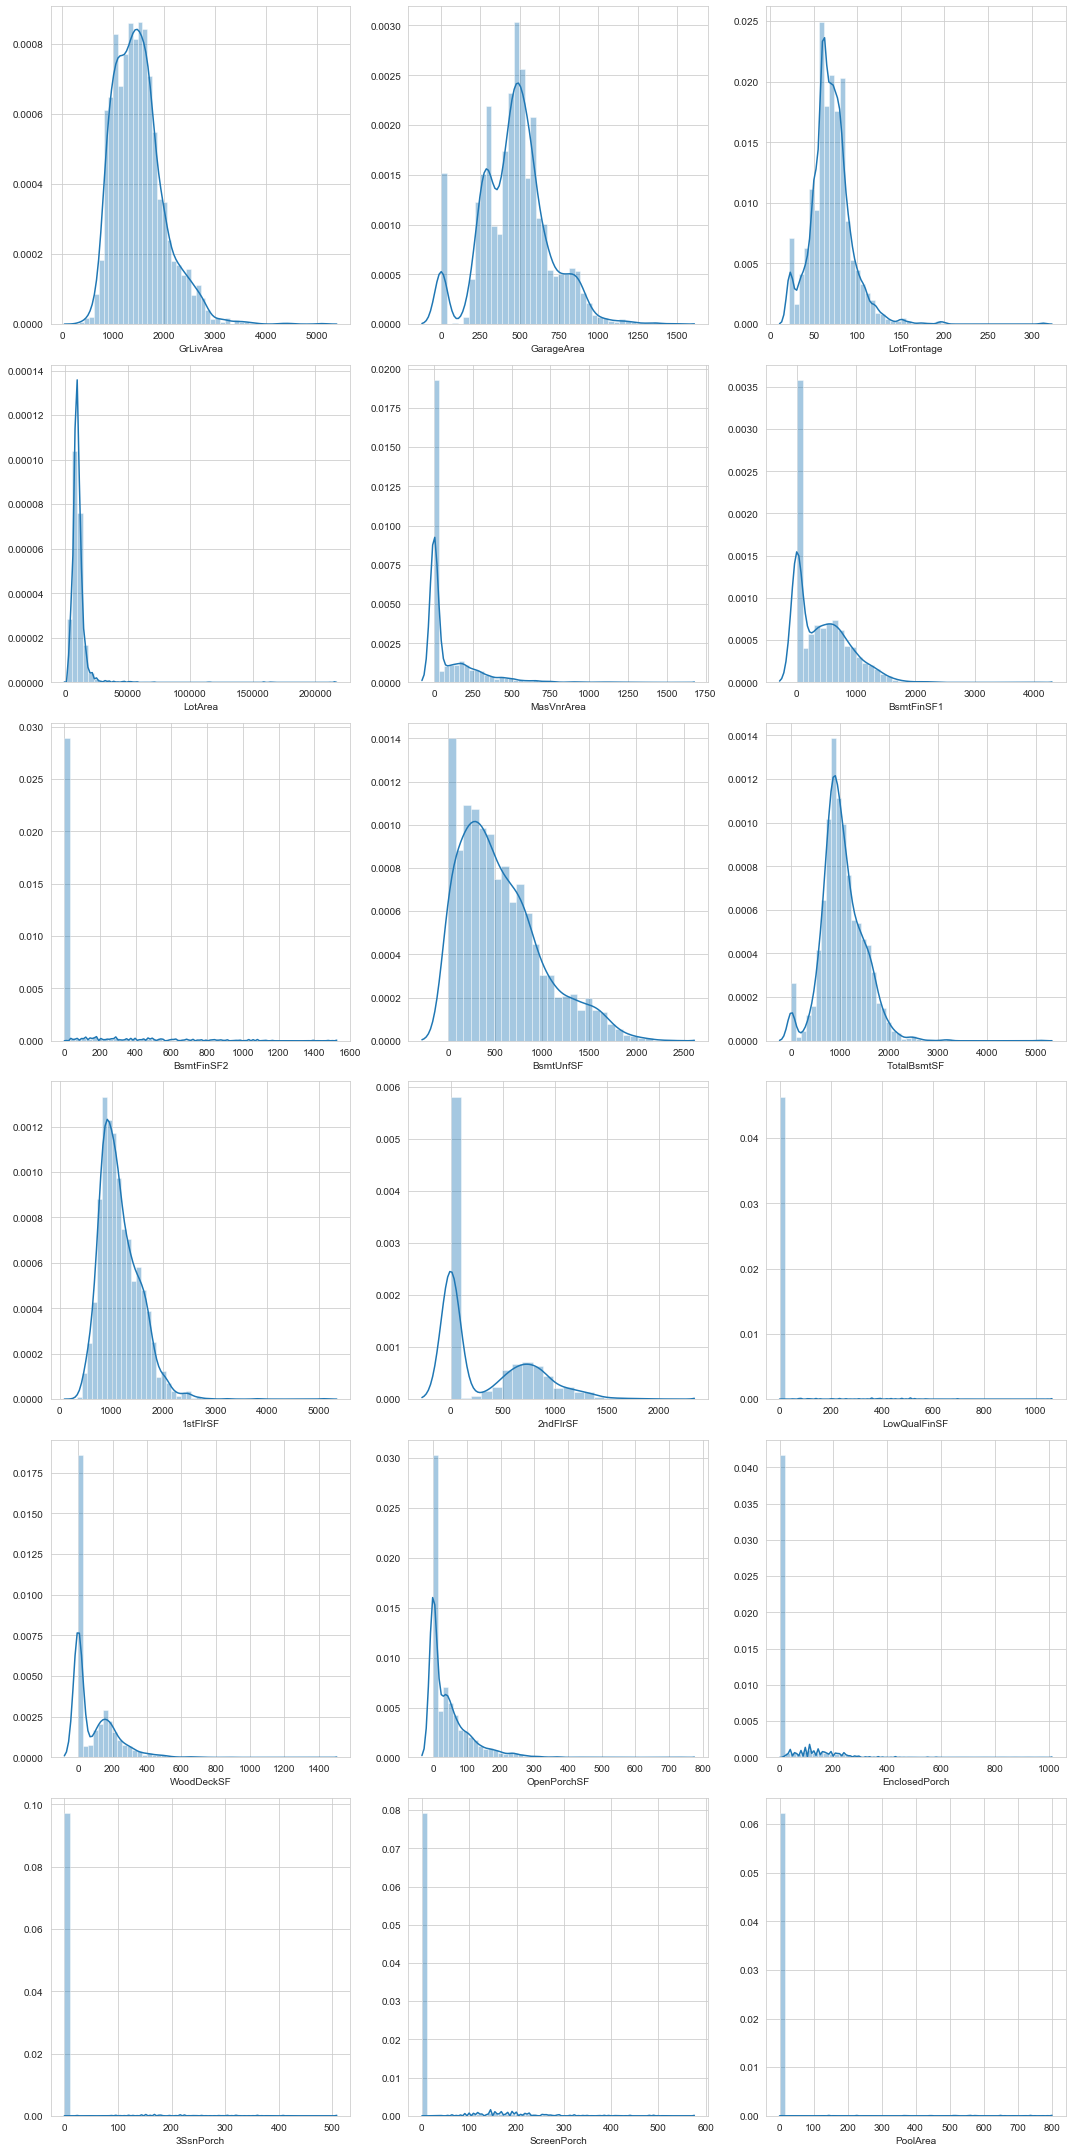

In [52]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(15, 30))

for (i, col) in enumerate(quants.columns):
    plt.subplot(6, 3, i + 1)
    sns.distplot(quants[col])
    
fig.tight_layout()

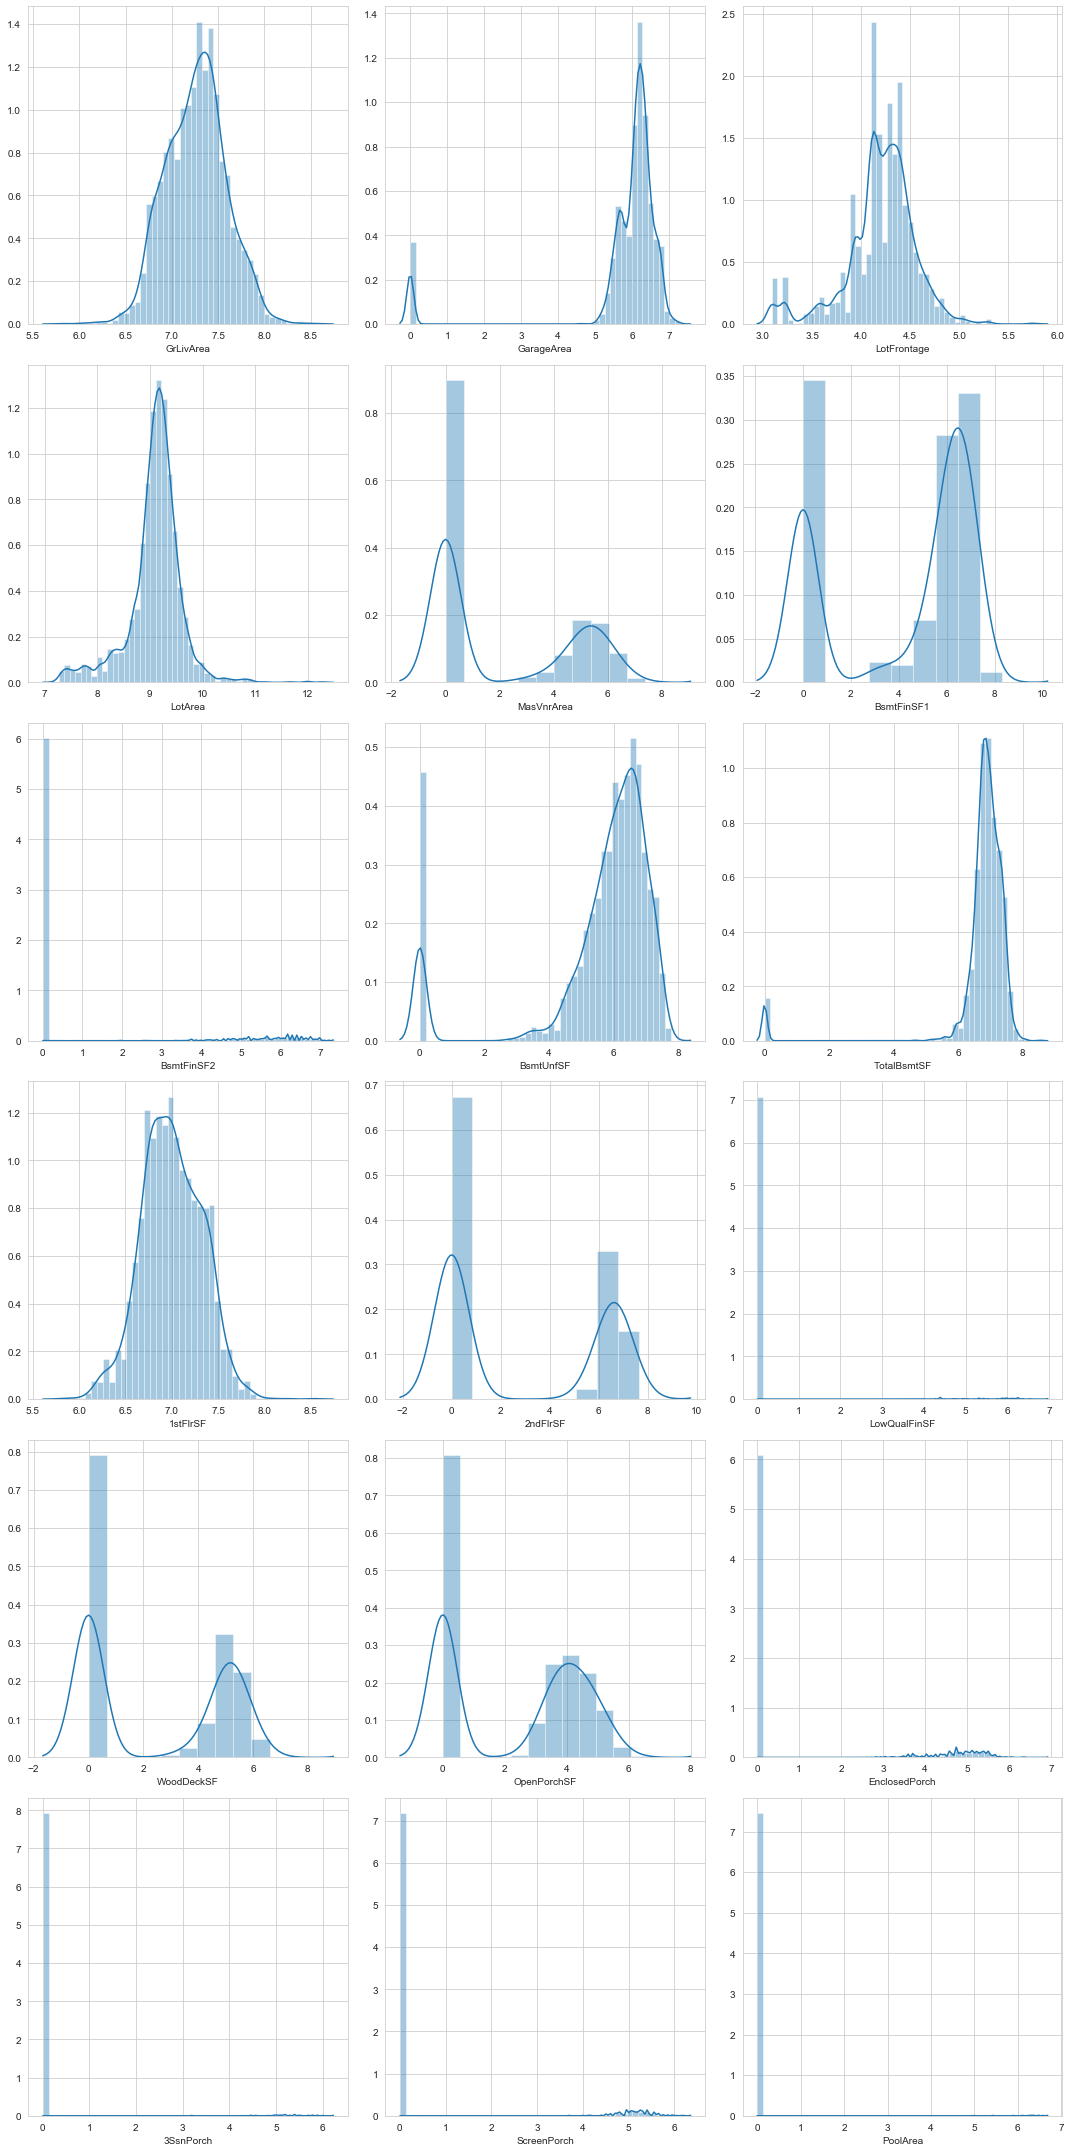

In [53]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(15, 30))

for (i, col) in enumerate(quants.columns):
    plt.subplot(6, 3, i + 1)
    sns.distplot(np.log(quants[col] + 1))
    
fig.tight_layout()

## Relationships among quantitative variables

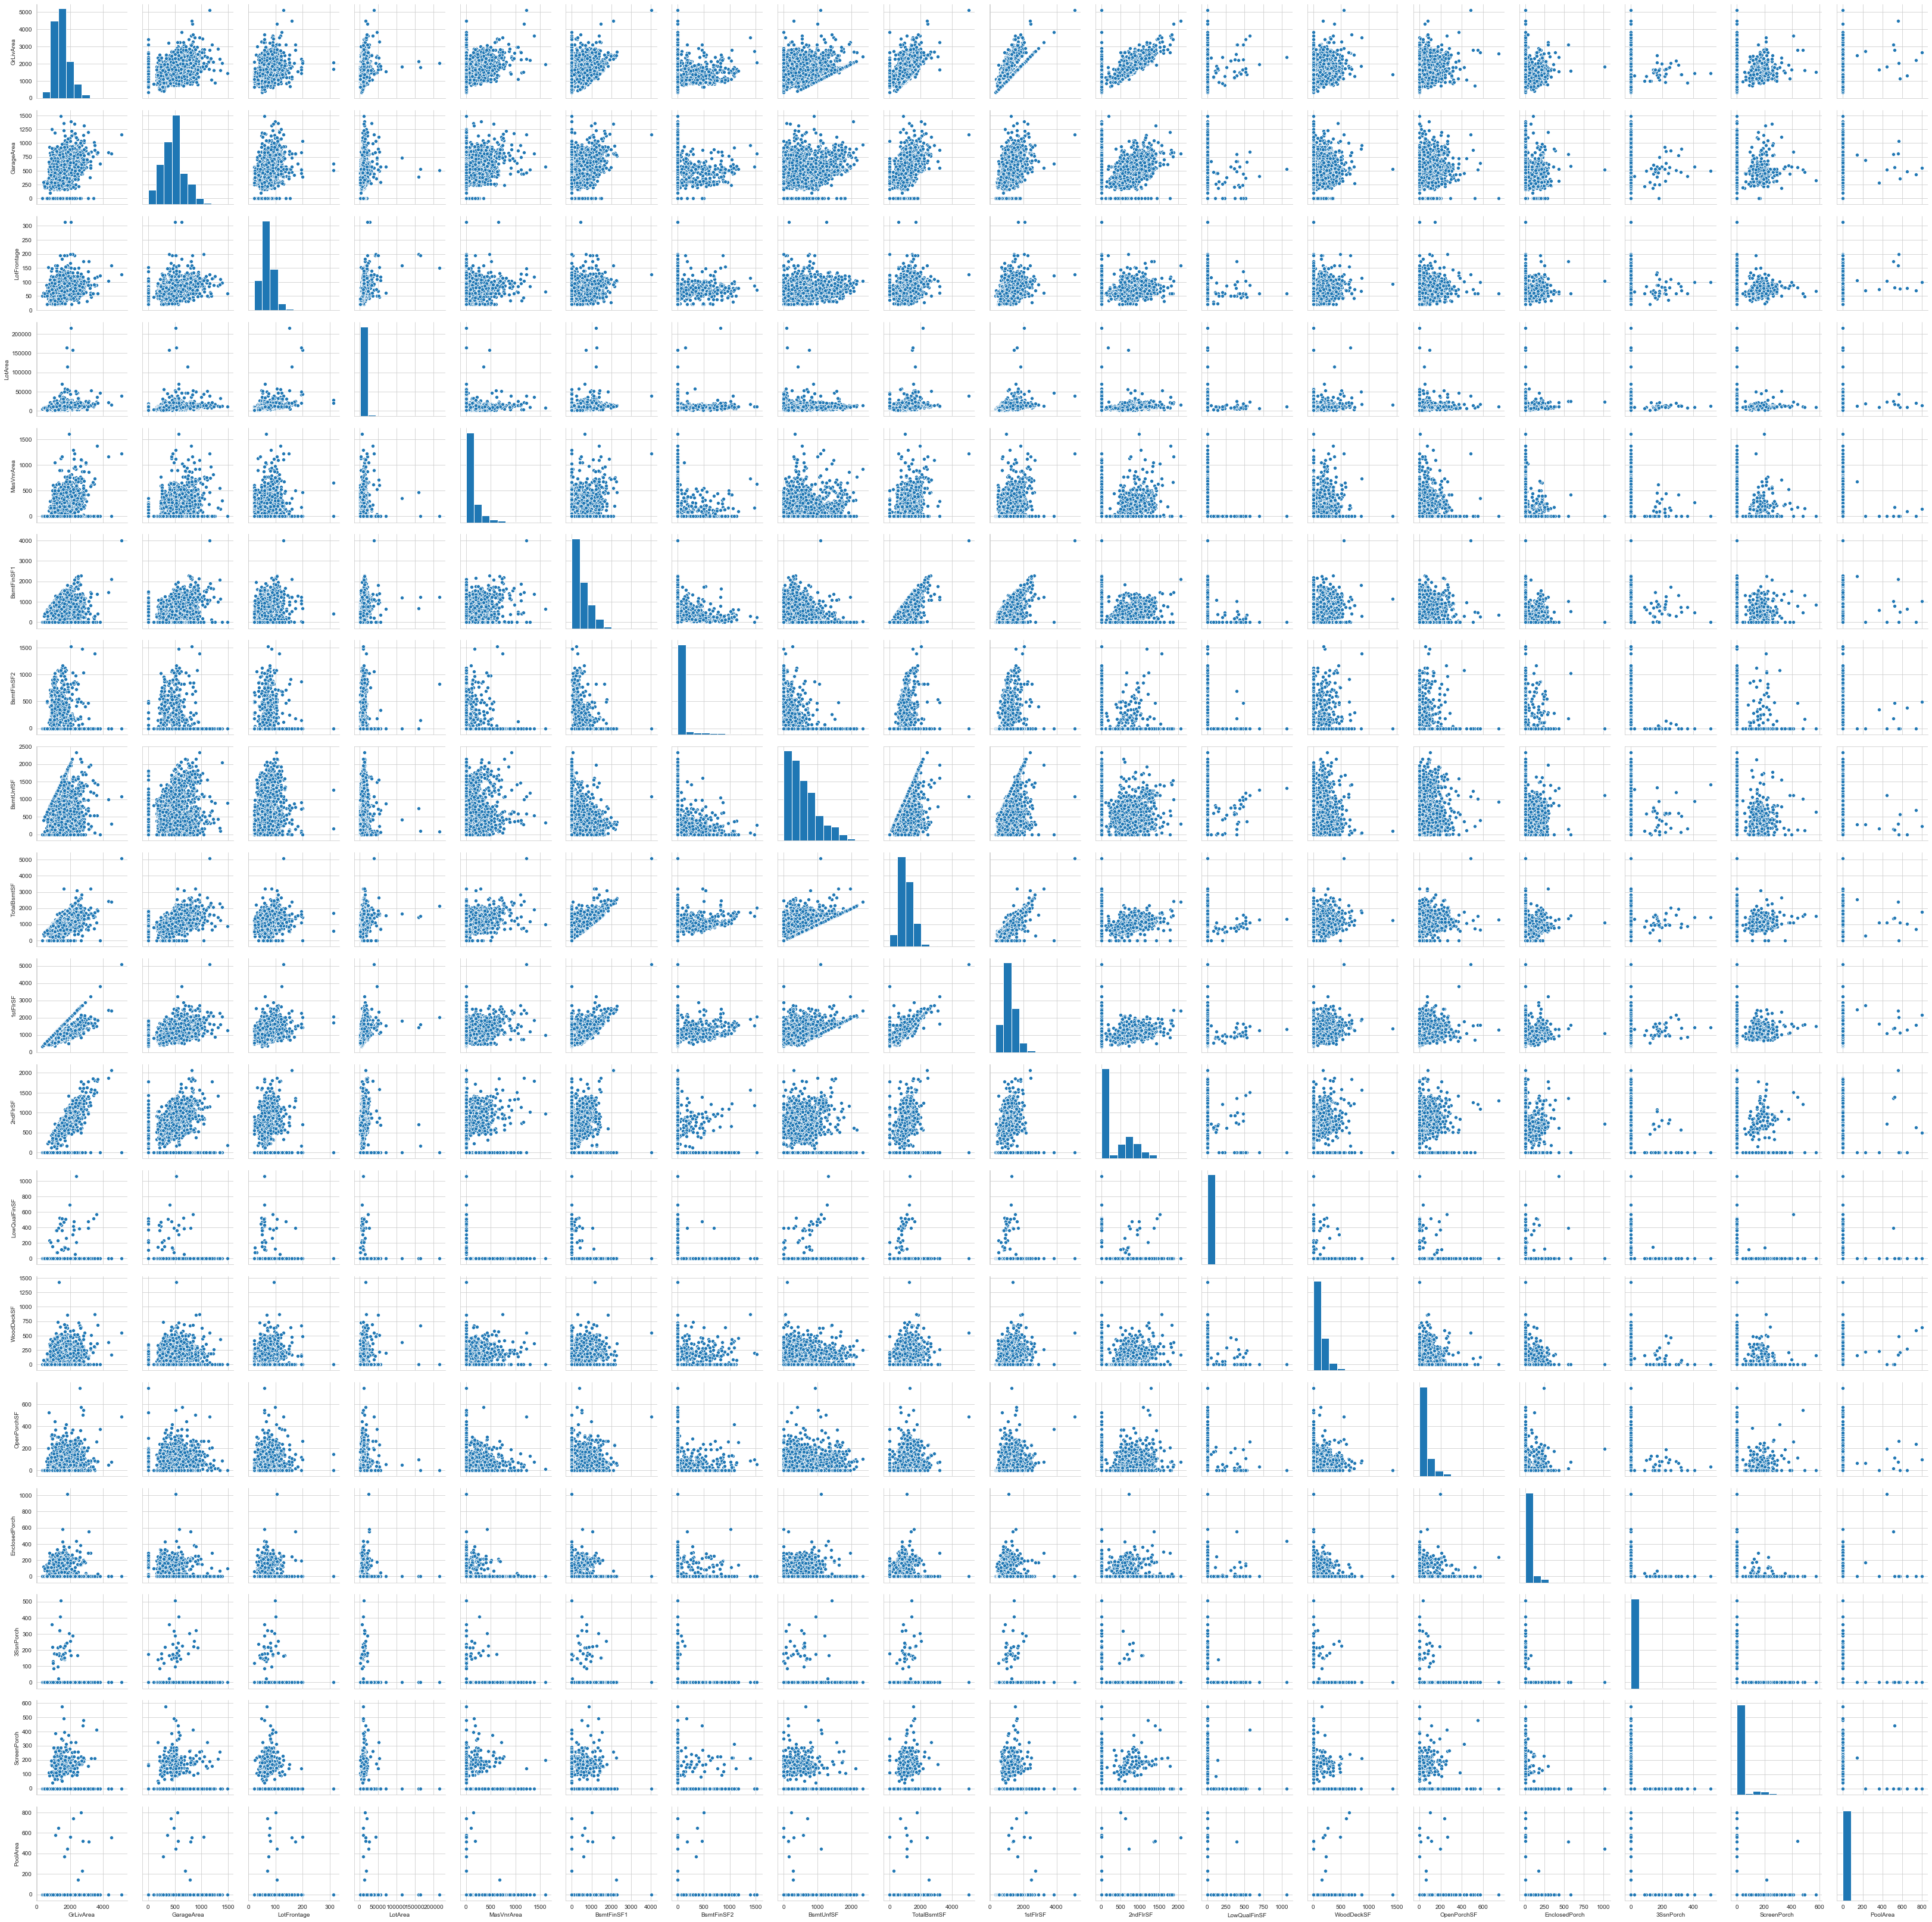

In [54]:
sns.pairplot(quants)

## Relationships between quantitatives and response

In [92]:
quants['SalePrice'] = edit['SalePrice']

### Standardized Variation of Information 

In [93]:
vi = np.array([D(quants.loc['train', :], col, 'SalePrice') for col in quants.columns])
vi = pd.DataFrame(vi, columns=['D'], index=quants.columns).sort_values(by='D', ascending=True)
vi.T

SalePrice   LotArea  GrLivArea  1stFlrSF  BsmtUnfSF  TotalBsmtSF  \
D        0.0  0.233784   0.260418  0.282046   0.295057     0.301709   

   GarageArea  BsmtFinSF1  LotFrontage  OpenPorchSF  2ndFlrSF  WoodDeckSF  \
D    0.411441    0.448458     0.585568      0.61628  0.625943    0.646352   

   MasVnrArea  EnclosedPorch  BsmtFinSF2  ScreenPorch  LowQualFinSF  \
D    0.651321       0.876909    0.891351     0.926541      0.981579   

   3SsnPorch  PoolArea  
D   0.984145  0.995703

### Scatterplots

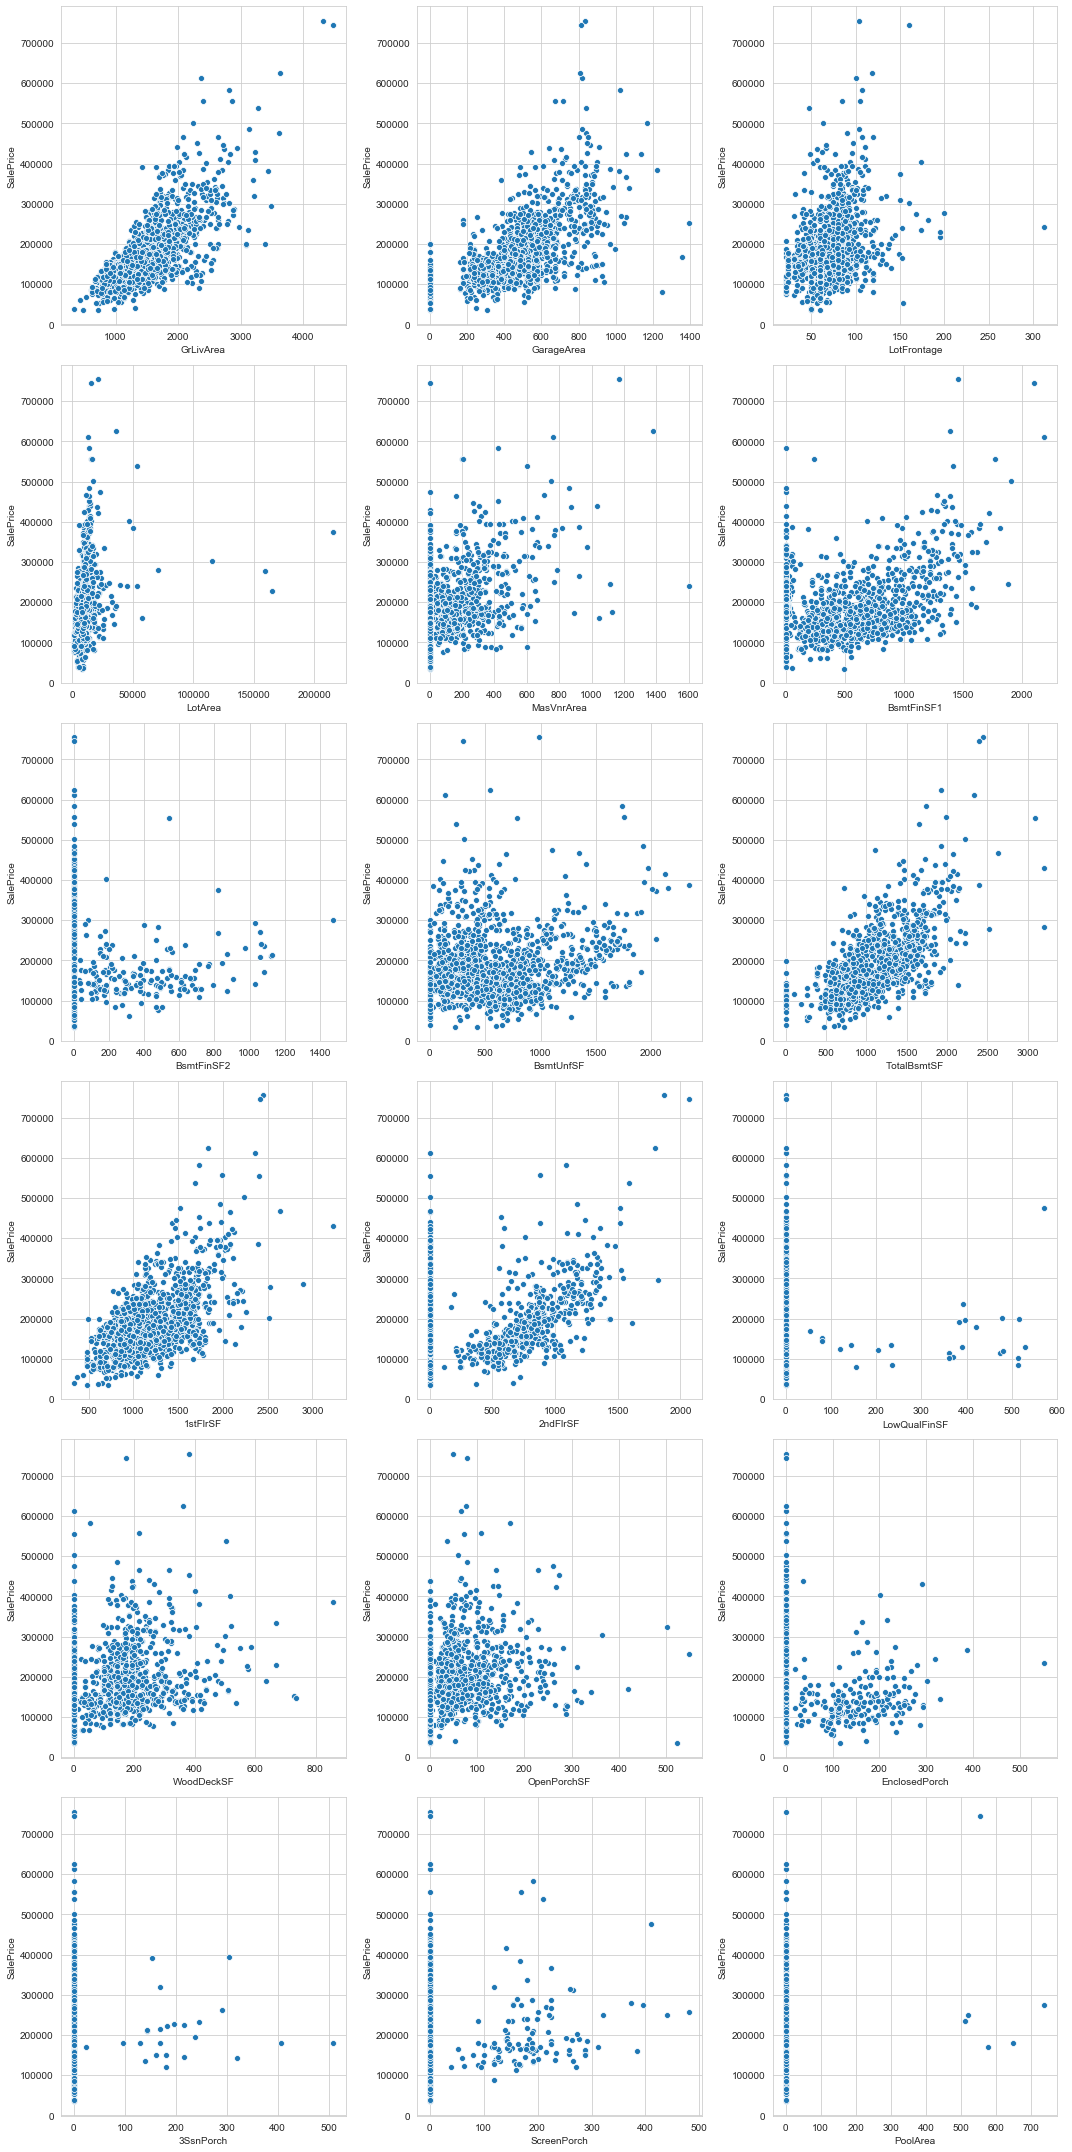

In [95]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(15, 30))

for (i, col) in enumerate(quants.drop(columns=['SalePrice']).columns):
    plt.subplot(6, 3, i + 1)
    sns.scatterplot(x=col, y='SalePrice', data=quants)
    
fig.tight_layout()

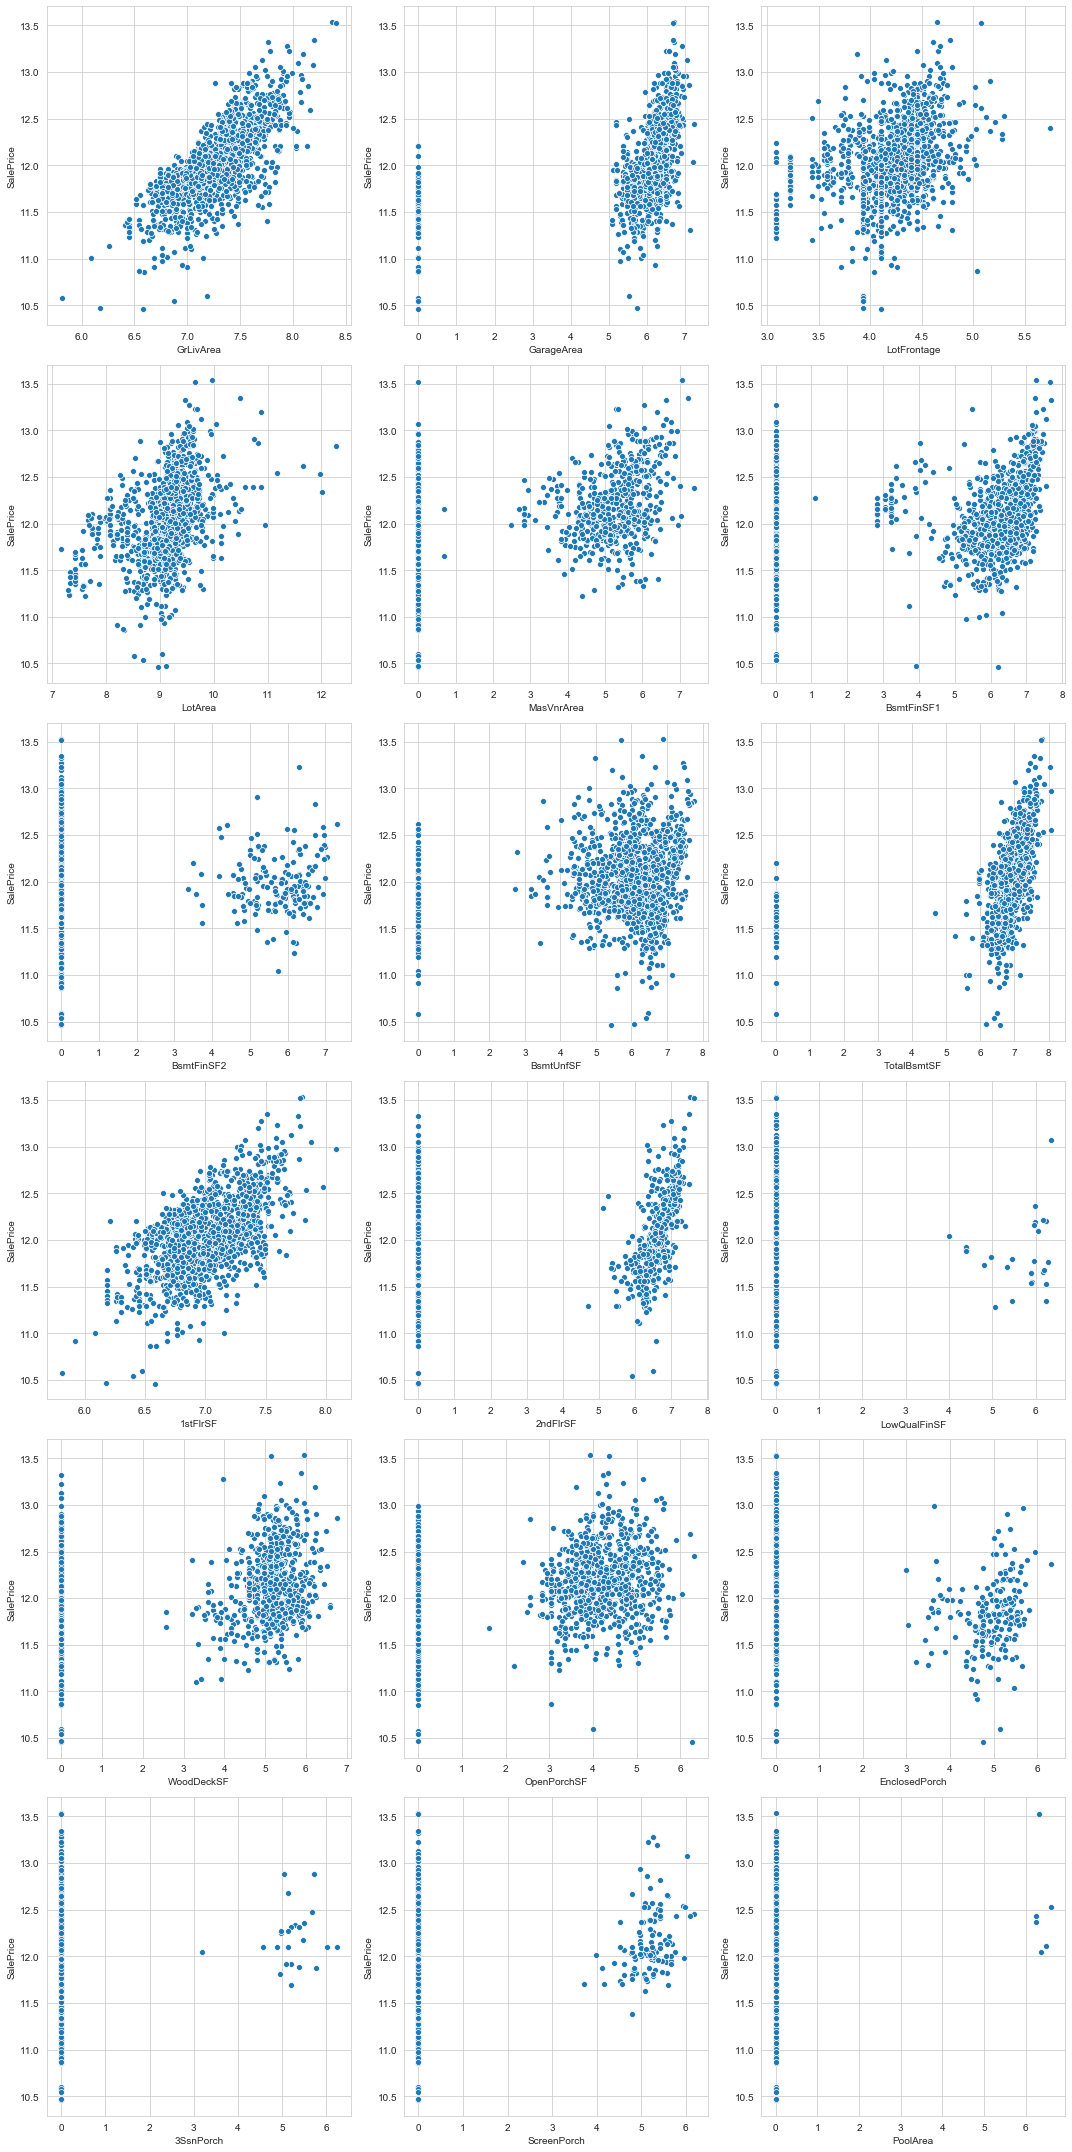

In [97]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(15, 30))

for (i, col) in enumerate(quants.drop(columns=['SalePrice']).columns):
    plt.subplot(6, 3, i + 1)
    sns.scatterplot(x=np.log(quants[col] + 1), y=np.log(quants['SalePrice']))
    
fig.tight_layout()

### Joint distribution plots

<Figure size 2160x1440 with 0 Axes>

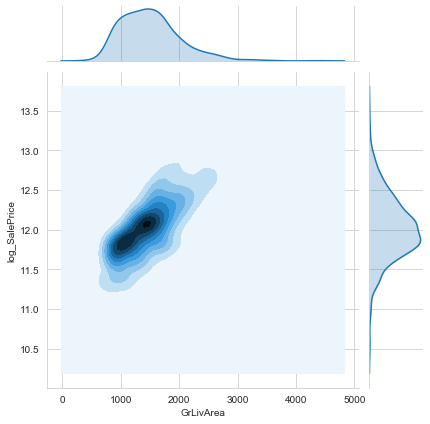

<Figure size 2160x1440 with 0 Axes>

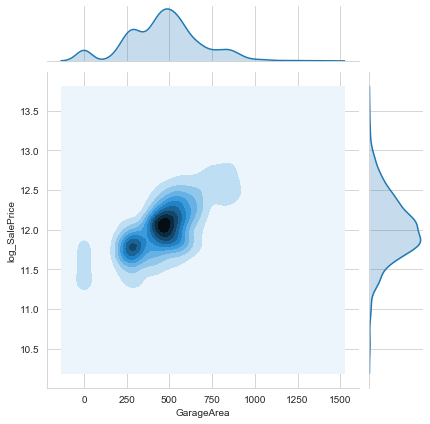

<Figure size 2160x1440 with 0 Axes>

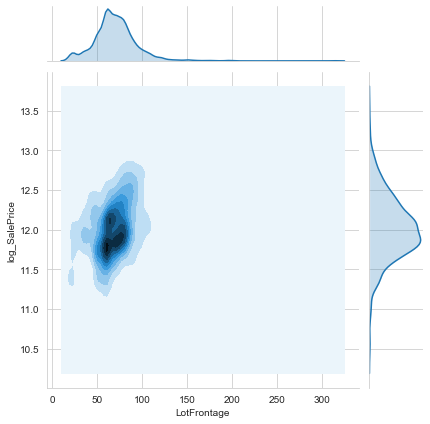

<Figure size 2160x1440 with 0 Axes>

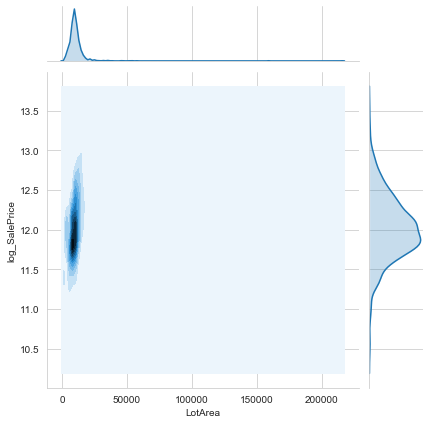

<Figure size 2160x1440 with 0 Axes>

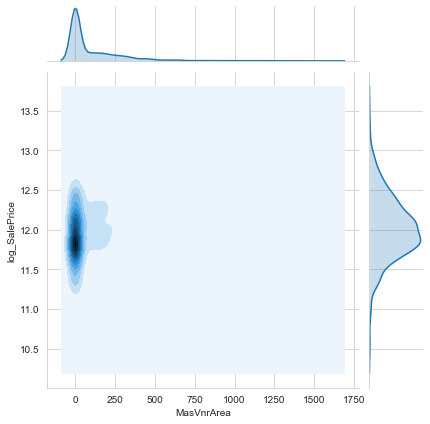

<Figure size 2160x1440 with 0 Axes>

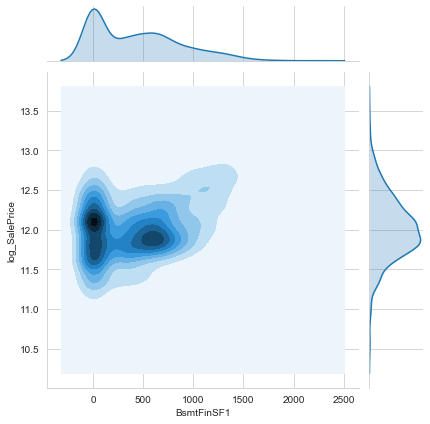

<Figure size 2160x1440 with 0 Axes>

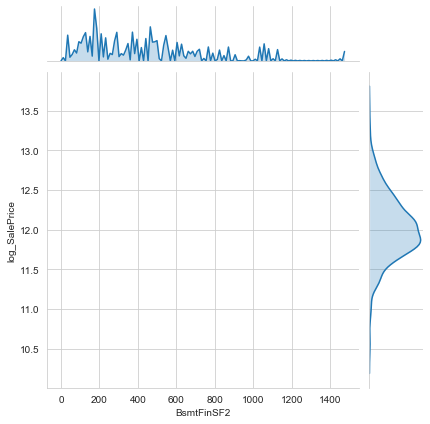

<Figure size 2160x1440 with 0 Axes>

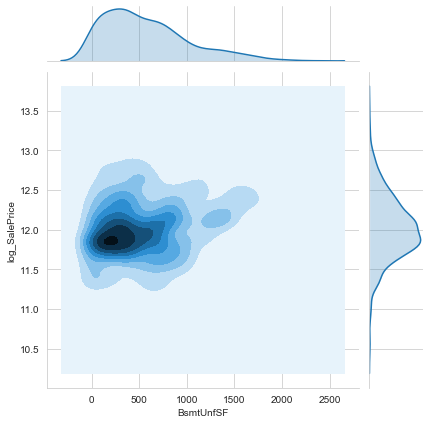

<Figure size 2160x1440 with 0 Axes>

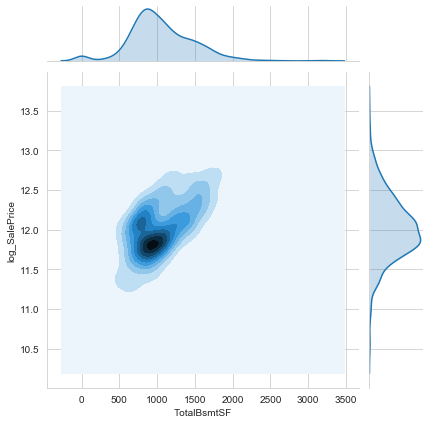

<Figure size 2160x1440 with 0 Axes>

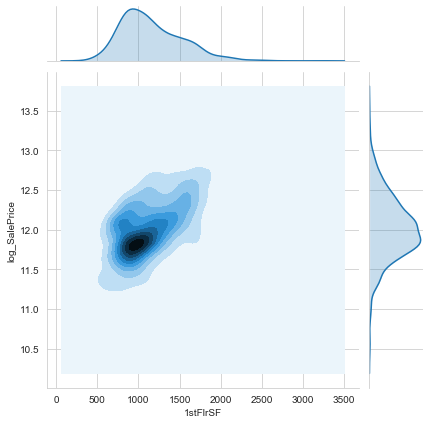

<Figure size 2160x1440 with 0 Axes>

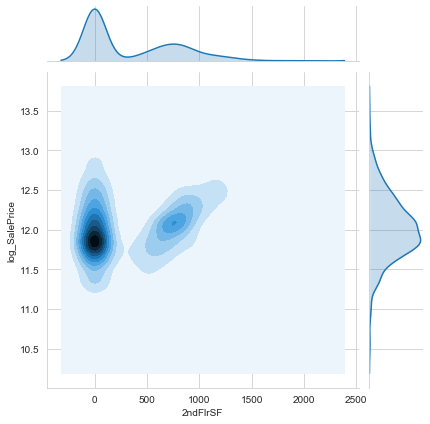

<Figure size 2160x1440 with 0 Axes>

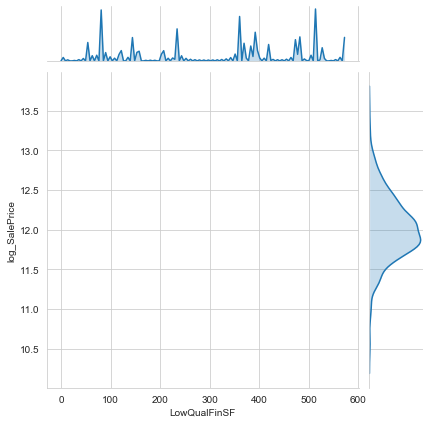

<Figure size 2160x1440 with 0 Axes>

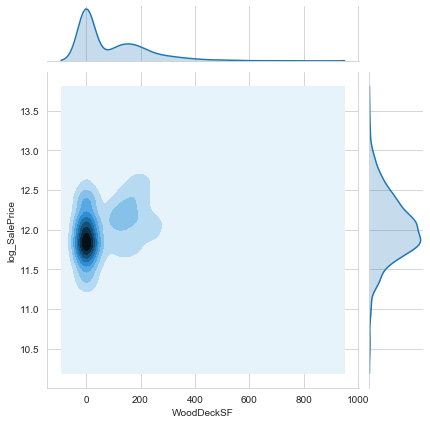

<Figure size 2160x1440 with 0 Axes>

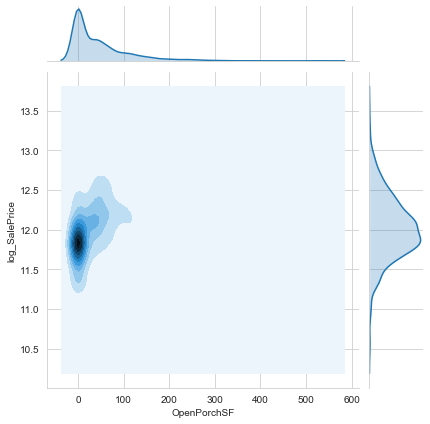

<Figure size 2160x1440 with 0 Axes>

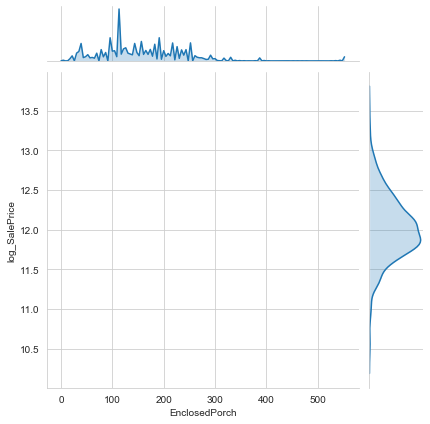

<Figure size 2160x1440 with 0 Axes>

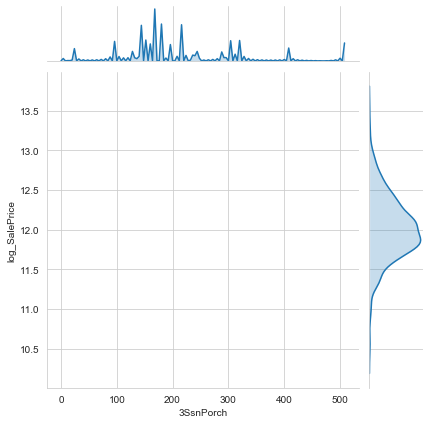

<Figure size 2160x1440 with 0 Axes>

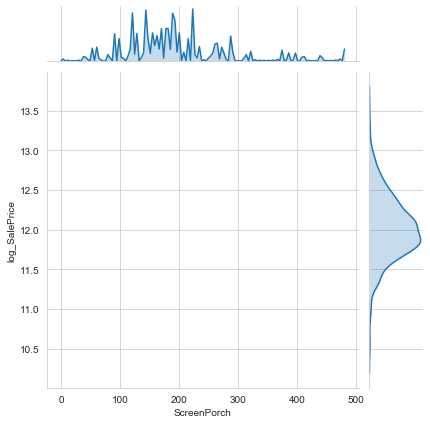

<Figure size 2160x1440 with 0 Axes>

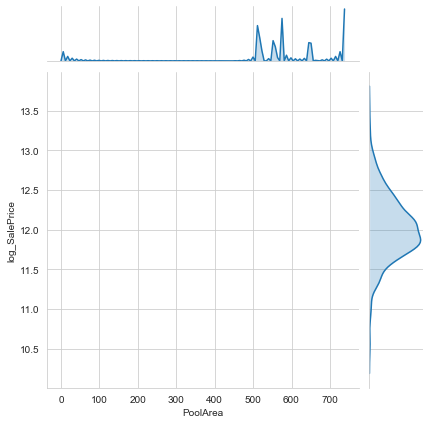

In [63]:
for (i, col) in enumerate(quants.drop(columns=['log_SalePrice']).columns):
    plt.figure(figsize=(30, 20))
    sns.jointplot(x=col, y='SalePrice', data=quants, kind='kde')
    
fig.tight_layout()

# Feature Selection/Engineering

## Categoricals

Drop:
- `Heating`, `RoofMatl` and `Condition2` for unbalanced distributions and low association with response
- `CentralAir`, `Electrical`,  `Condition1` for low association with response and low self-information
- `LandContour`, `RoofStyle` for low association with response
- `BldgType` for low association with response and high association with `MSSubClass`
- `SaleType ` for low association with response and high association with `SaleCondition`
- `Exterior2nd` for very high association with `Exterior1st`
- `Foundation` and `House Style` for high association with `MSSubClass`

In [64]:
cat_drop_cols = {'Heating', 'RoofMatl', 'Condition2',
                 'Electrical', 'Condition1',
                 'LandContour', 'RoofStyle', 'BldgType',
                 'SaleType', 'Exterior2nd', 'Foundation',
                 'HouseStyle'}
print('Remaining categorical columns:')
set(cats.columns).difference(cat_drop_cols)

Remaining categorical columns:


{'CentralAir',
 'Exterior1st',
 'GarageType',
 'LotConfig',
 'MSSubClass',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'SaleCondition'}

To consider:
- Instead of dropping electrical, convert into binary variable with `SBrkr` and `Other` values.
- drop `CBlock`, `Stone`, `ImStucc` values of `Exterior1st`, `150` value of `MSSubClass`, and `BrkCmn` of `MasVnrType` due to low value counts (not showing up in. violin plot) 

## Ordinals

Drop:
- `PoolQC`, `LandSlope` for highly unbalanced distribution and low association with response
- `BsmtHalfBath`, `HalfBath`, `Fence`, `KitchenAbvGr`, `MoSold` for low association with response
- `BsmtFinType2` for assumed high association and possible discrepancy/conflict with `BsmtFinType1` *
- `GarageYrBlt`, `YearRemodAdd` for high association with `YearBlt`
- `BsmtFullBath` for unbalanced distribution, low assocation with response and assumed redunancy with other (better) basement variables.
- `Fireplaces` for unbalanced distribution, high association with `FireplaceQu`
- `GarageQual`, `GarageCond` for unbalanced distributions, high association with `GarageCars`, `GarageFinish` and low association with response

In [65]:
ord_drop_cols = {'PoolQC', 'LandSlope', 'BsmtHalfBath', 'HalfBath', 'Fence', 'KitchenAbvGr', 'MoSold',
                 'BsmtFinType2', 'GarageYrBlt', 'GarageYrBlt', 'YearRemodAdd', 'BsmtFullBath', 'Fireplaces',
                 'GarageQual', 'GarageCond'}
print('Remaining ordinal columns:')
set(ords.columns).difference(ord_drop_cols)

Remaining ordinal columns:


{'BedroomAbvGr',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtQual',
 'ExterCond',
 'ExterQual',
 'FireplaceQu',
 'FullBath',
 'Functional',
 'GarageCars',
 'GarageFinish',
 'HeatingQC',
 'KitchenQual',
 'LotShape',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YrSold',
 'log_SalePrice'}

Notes:
- Possible adjustments:
    - map `BsmtFinType1` values to three values 0 -> 0, {1, 2, 3, 4} -> 1, {5, 6} -> 2
    - map `Functional` values to three values {0, 1} -> 0, {2, 3, 4, 5} -> 1, 6 -> 2
    - drop value 5 from `GarageCars`
    - drop value 1 from `HeatingQC`

## Quantitatives

In [69]:
quants.columns

Index(['GrLivArea', 'GarageArea', 'LotFrontage', 'LotArea', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'log_SalePrice'],
      dtype='object')

Drop:
- `EnclosedPorch`, `3SSnPorch`, `ScreenPorch`, `PoolArea`, `LowQualFinSF`, `BsmtFinSF2` for highly unbalanced distributions

In [98]:
quant_drop_cols = {'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'LowQualFinSF', 'BsmtFinSF2'}
print('Remaining quantitative columns:')
set(quants.columns).difference(quant_drop_cols)

Remaining quantitative columns:


{'1stFlrSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'GarageArea',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'MasVnrArea',
 'OpenPorchSF',
 'SalePrice',
 'TotalBsmtSF',
 'WoodDeckSF'}

Notes:
- Possible adjustments:
    - map `BsmtFinType1` values to three values 0 -> 0, {1, 2, 3, 4} -> 1, {5, 6} -> 2
    - map `Functional` values to three values {0, 1} -> 0, {2, 3, 4, 5} -> 1, 6 -> 2
    - drop value 5 from `GarageCars`
    - drop value 1 from `HeatingQC`

## Model data

In [122]:
drop_cols = cat_drop_cols.union(ord_drop_cols).union(quant_drop_cols)
df = edit.drop(columns=drop_cols)
df.info()

<class 'preprocess.hp_df_plus'>
MultiIndex: 2916 entries, (train, 1) to (test, 2919)
Data columns (total 43 columns):
MSSubClass       2916 non-null category
MSZoning         2916 non-null category
Neighborhood     2916 non-null category
LotConfig        2916 non-null category
Exterior1st      2916 non-null category
MasVnrType       2916 non-null category
CentralAir       2916 non-null category
GarageType       2916 non-null category
SaleCondition    2916 non-null category
OverallQual      2916 non-null int64
OverallCond      2916 non-null int64
ExterQual        2916 non-null int64
ExterCond        2916 non-null int64
BsmtQual         2916 non-null int64
BsmtCond         2916 non-null int64
BsmtExposure     2916 non-null int64
BsmtFinType1     2916 non-null int64
HeatingQC        2916 non-null int64
FullBath         2916 non-null int64
BedroomAbvGr     2916 non-null int64
TotRmsAbvGrd     2916 non-null int64
KitchenQual      2916 non-null int64
Functional       2916 non-null int64
Fire

In [123]:
from sklearn.preprocessing import StandardScaler

def model_df(df, response, cat_cols, *args, **kwargs):
        resp_ser = df[response]
        new = pd.get_dummies(df, columns=cat_cols)
        sc = StandardScaler()
        new.loc['train'] = sc.fit_transform(new.loc['train'])
        new.loc['test'] = sc.transform(new.loc['test'])
        new.loc[:, response] = resp_ser
        return new
    
cat_cols = df.select_dtypes('category').columns
quant_cols = df.select_dtypes('float64').columns

# log transform quantitative variables and response
df.loc[:, quant_cols] = np.log(df[quant_cols] + 1)
df = df.rename(index=str, columns={col: 'log_' + col for col in quant_cols})
df.head()

MSSubClass MSZoning Neighborhood LotConfig Exterior1st MasVnrType  \
split Id                                                                     
train 1          60       RL      CollgCr    Inside     VinylSd    BrkFace   
      2          20       RL      Veenker       FR2     MetalSd       None   
      3          60       RL      CollgCr    Inside     VinylSd    BrkFace   
      4          70       RL      Crawfor    Corner     Wd Sdng       None   
      5          60       RL      NoRidge       FR2     VinylSd    BrkFace   

         CentralAir GarageType SaleCondition  OverallQual  ...  log_LotArea  \
split Id                                                   ...                
train 1           Y     Attchd        Normal            7  ...     9.042040   
      2           Y     Attchd        Normal            6  ...     9.169623   
      3           Y     Attchd        Normal            7  ...     9.328212   
      4           Y     2Types       Abnorml            7  ...     9.164401   
      5           Y     Attchd        Normal            8  ...     9.565284   

          log_MasVnrArea  log_BsmtFinSF1  log_BsmtUnfSF  log_TotalBsmtSF  \
split Id                                                                   
train 1         5.283204        6.561031       5.017280         6.753438   
      2         0.000000        6.886532       5.652489         7.141245   
      3         5.093750        6.188264       6.075346         6.825460   
      4         0.000000        5.379897       6.293419         6.629363   
      5         5.860786        6.486161       6.196444         7.044033   

          log_1stFlrSF  log_2ndFlrSF  log_WoodDeckSF  log_OpenPorchSF  \
split Id                                                                
train 1       6.753438      6.751101        0.000000         4.127134   
      2       7.141245      0.000000        5.700444         0.000000   
      3       6.825460      6.765039        0.000000         3.761200   
      4       6.869014      6.629363        0.000000         3.583519   
      5       7.044033      6.960348        5.262690         4.442651   

          log_SalePrice  
split Id                 
train 1       12.247699  
      2       12.109016  
      3       12.317171  
      4       11.849405  
      5       12.429220  

[5 rows x 43 columns]

In [124]:
model = model_df(df, 'log_SalePrice', cat_cols)
model.head()

OverallQual  OverallCond  ExterQual  ExterCond  BsmtQual  BsmtCond  \
split Id                                                                       
train 1      0.657759    -0.517236   1.060445  -0.238371  0.622962  0.118007   
      2     -0.069369     2.177448  -0.689349  -0.238371  0.622962  0.118007   
      3      0.657759    -0.517236   1.060445  -0.238371  0.622962  0.118007   
      4      0.657759    -0.517236  -0.689349  -0.238371 -0.653628  1.927866   
      5      1.384886    -0.517236   1.060445  -0.238371  0.622962  0.118007   

          BsmtExposure  BsmtFinType1  HeatingQC  FullBath  ...  \
split Id                                                   ...   
train 1      -0.588375      1.166364   0.892827  0.792856  ...   
      2       2.234662      0.691806   0.892827  0.792856  ...   
      3       0.352637      1.166364   0.892827  0.792856  ...   
      4      -0.588375      0.691806  -0.149520 -1.026343  ...   
      5       1.293650      1.166364   0.892827  0.792856  ...   

          GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
split Id                                                               
train 1            -0.101991           -0.172285           -0.069481   
      2            -0.101991           -0.172285           -0.069481   
      3            -0.101991           -0.172285           -0.069481   
      4            -0.101991           -0.172285           -0.069481   
      5            -0.101991           -0.172285           -0.069481   

          GarageType_Detchd  SaleCondition_Abnorml  SaleCondition_AdjLand  \
split Id                                                                    
train 1           -0.478016              -0.272917              -0.052468   
      2           -0.478016              -0.272917              -0.052468   
      3           -0.478016              -0.272917              -0.052468   
      4           -0.478016               3.664116              -0.052468   
      5           -0.478016              -0.272917              -0.052468   

          SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
split Id                                                                     
train 1              -0.091129             -0.117974              0.466058   
      2              -0.091129             -0.117974              0.466058   
      3              -0.091129             -0.117974              0.466058   
      4              -0.091129             -0.117974             -2.145658   
      5              -0.091129             -0.117974              0.466058   

          SaleCondition_Partial  
split Id                         
train 1               -0.303651  
      2               -0.303651  
      3               -0.303651  
      4               -0.303651  
      5               -0.303651  

[5 rows x 118 columns]

In [126]:
model = model.reset_index()
model = model.rename({'level_0': 'split'}, axis='columns')
model.to_csv('model.csv', index=False)

In [ ]:
dd